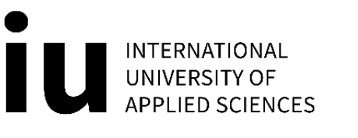

## Predictive Inventory Management for Retail Using Advanced Machine Learning Techniques

Loading the dataset

Libraries

In [1]:
# Importing libraries required.
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.tseries.holiday import USFederalHolidayCalendar
from sklearn.model_selection import GridSearchCV, learning_curve
from pandas.tseries.offsets import CustomBusinessDay
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings


# Suppress warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset.
data = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')

# Check the data columns
print(data.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


Data cleaning

In [3]:
# Check for missing values
print(data.isnull().sum())

# Check for duplicate rows
print(data.duplicated().sum())

# check for potential outliers
print(data.describe())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
0
            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.0

Handling Outliers

In [4]:
# Calculate IQR for Quantity
Q1_qty = data['Quantity'].quantile(0.25)
Q3_qty = data['Quantity'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty

# Define bounds for outliers
lower_bound_qty = Q1_qty - 1.5 * IQR_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty

# Remove outliers
df_cleaned = data[(data['Quantity'] >= lower_bound_qty) & (data['Quantity'] <= upper_bound_qty)]

# Save cleaned data to a new CSV file
df_cleaned.to_csv('superstore_cleaned.csv', index=False)

Sales Distribution Across Product Categories

In [5]:
# Load cleaned data.
df = pd.read_csv('superstore_cleaned.csv', encoding='ISO-8859-1')

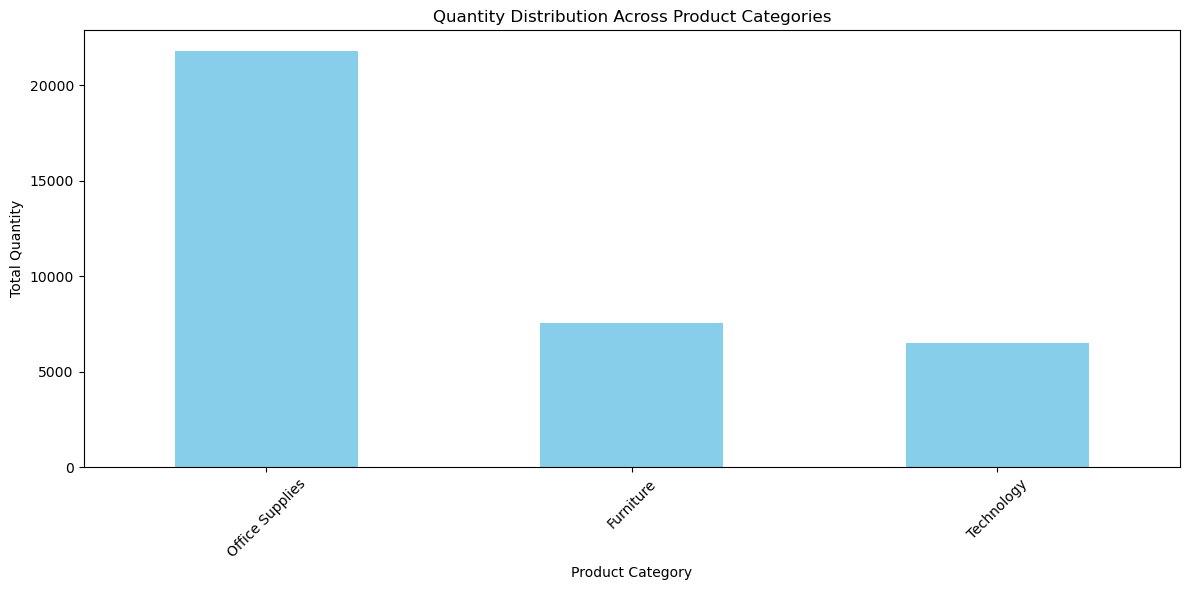

In [6]:
# Plotting sales distribution across product categories
plt.figure(figsize=(12, 6))
sales_by_category = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Quantity Distribution Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Leveraging Historical Sales Data to Predict Future Sales Quantities

Category: Furniture


16:21:10 - cmdstanpy - INFO - Chain [1] start processing
16:21:11 - cmdstanpy - INFO - Chain [1] done processing


Results for category: Furniture
ARIMA:
  MAE: 39.17260538985392
  MSE: 1922.954135944965
  RMSE: 43.8515009542999
  R2 Score: -2.370122342043224

SARIMA:
  MAE: 11.792328919073263
  MSE: 210.35640395185703
  RMSE: 14.503668637688088
  R2 Score: 0.6313345162537396

Prophet:
  MAE: 11.154964809299265
  MSE: 225.57927530400414
  RMSE: 15.0192967646293
  R2 Score: 0.604655284599205

Random Forest:
  MAE: 17.504150943396226
  MSE: 525.7713558962264
  RMSE: 22.92970466221112
  R2 Score: 0.07854599327638667

Gradient Boosting:
  MAE: 17.448083882392787
  MSE: 593.1816327527985
  RMSE: 24.355320419834317
  R2 Score: -0.03959560764433068

Category: Office Supplies


16:22:11 - cmdstanpy - INFO - Chain [1] start processing
16:22:11 - cmdstanpy - INFO - Chain [1] done processing


Results for category: Office Supplies
ARIMA:
  MAE: 49.368512207077245
  MSE: 4232.274313693913
  RMSE: 65.05593219448872
  R2 Score: -0.006991284640773587

SARIMA:
  MAE: 31.8429315149675
  MSE: 1585.7913095955153
  RMSE: 39.82199529902432
  R2 Score: 0.6226903292031623

Prophet:
  MAE: 31.82237040227287
  MSE: 1637.0625907170152
  RMSE: 40.46063013247588
  R2 Score: 0.6104912774841693

Random Forest:
  MAE: 46.33130188679246
  MSE: 3481.3152894528303
  RMSE: 59.00267188401581
  R2 Score: 0.17168550624830592

Gradient Boosting:
  MAE: 44.367229909801885
  MSE: 2918.4701650081784
  RMSE: 54.02286705653614
  R2 Score: 0.30560407884282015

Category: Technology


16:23:03 - cmdstanpy - INFO - Chain [1] start processing
16:23:03 - cmdstanpy - INFO - Chain [1] done processing


Results for category: Technology
ARIMA:
  MAE: 26.416063856352135
  MSE: 874.4214634970743
  RMSE: 29.57061824678467
  R2 Score: -0.4573552707244277

SARIMA:
  MAE: 17.987476183257844
  MSE: 519.5518239486769
  RMSE: 22.79367947367596
  R2 Score: 0.1340885137723664

Prophet:
  MAE: 15.078326978345194
  MSE: 407.30238166377626
  RMSE: 20.181733861682357
  R2 Score: 0.3211691415688782

Random Forest:
  MAE: 16.107674528301885
  MSE: 553.5676066222485
  RMSE: 23.528017481765193
  R2 Score: 0.07739608084775751

Gradient Boosting:
  MAE: 16.808624246512665
  MSE: 558.1743099443886
  RMSE: 23.62571289811989
  R2 Score: 0.06971831486482405



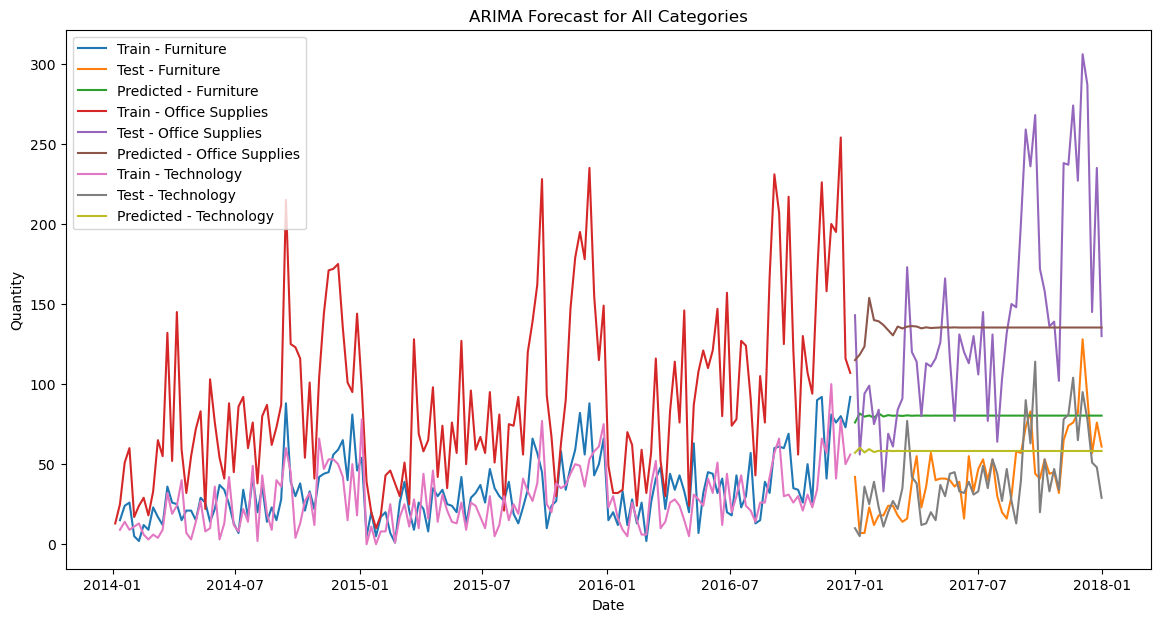

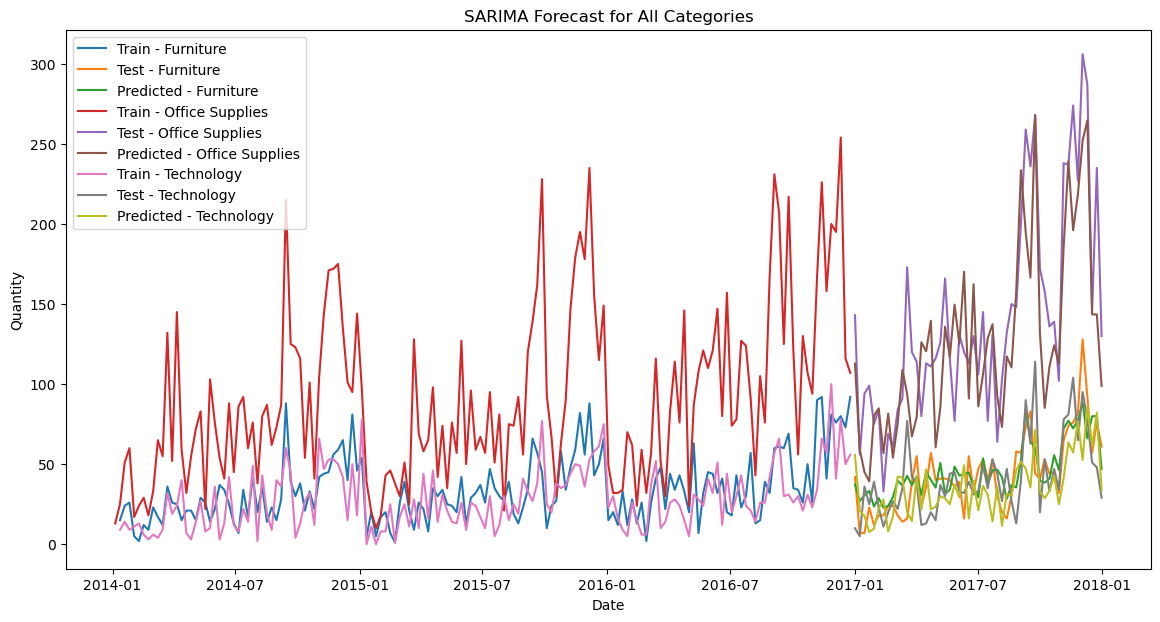

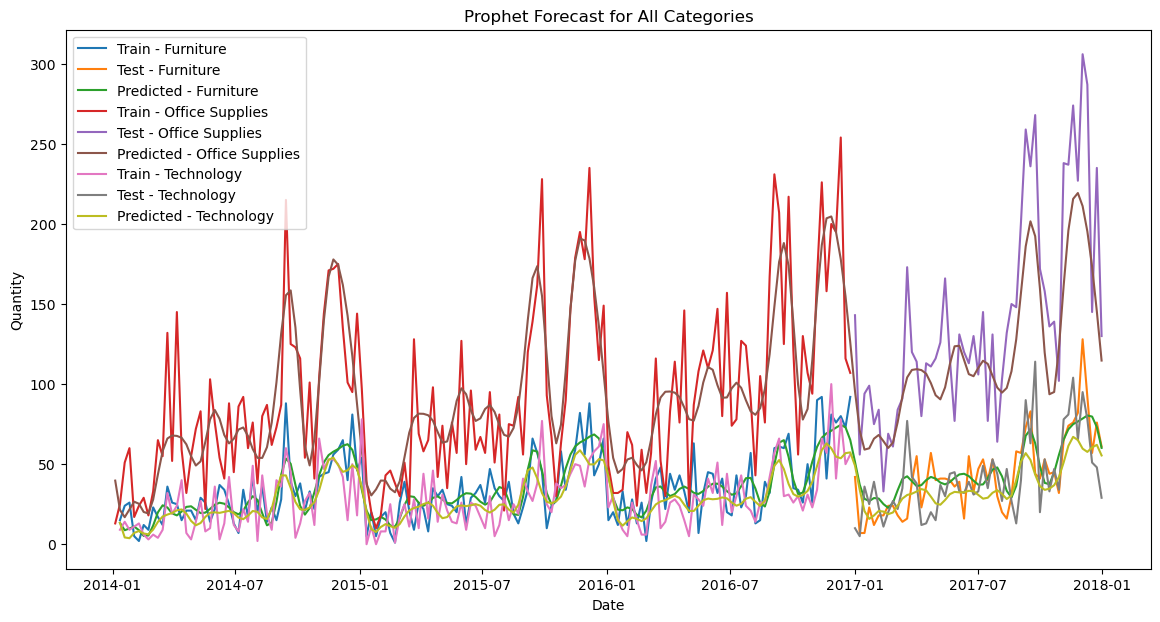

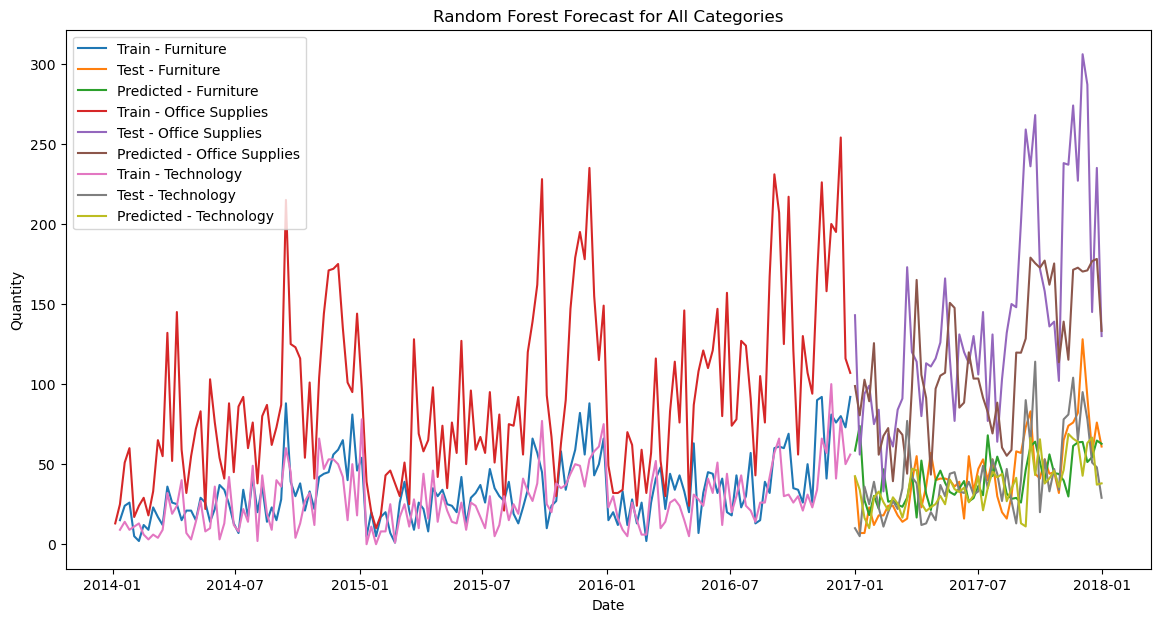

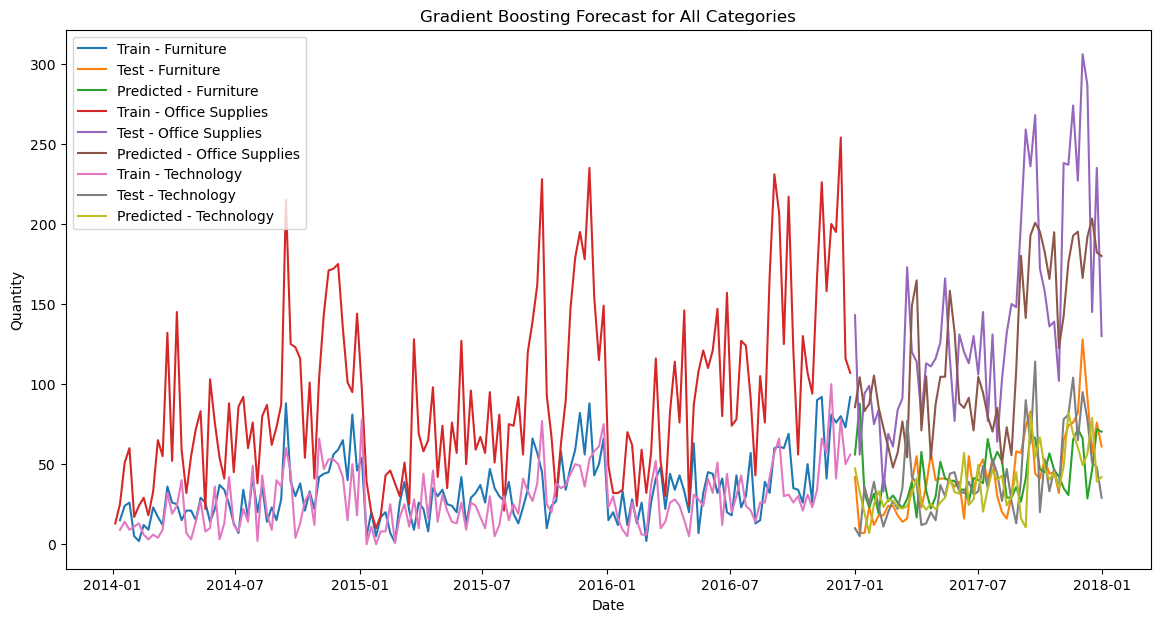

In [7]:
# Load the cleaned data
df = pd.read_csv('superstore_cleaned.csv', encoding='ISO-8859-1')

# Parse dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.set_index('Order Date')

# List of unique categories
categories = df['Category'].unique()

# Train-test split dates
train_end_date = pd.Timestamp('2016-12-31')
test_start_date = pd.Timestamp('2017-01-01')

# Helper function to plot actual vs predicted for multiple categories
def plot_forecast_multicategory(train_dict, test_dict, pred_dict, title):
    plt.figure(figsize=(14, 7))
    for category in train_dict.keys():
        plt.plot(train_dict[category], label=f'Train - {category}')
        plt.plot(test_dict[category], label=f'Test - {category}')
        plt.plot(pred_dict[category], label=f'Predicted - {category}')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.legend()
    plt.show()

# Helper function to evaluate models
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, mse, rmse, r2, mape

# Function to create lag features
def create_lag_features(data, lags):
    df_lag = pd.DataFrame(index=data.index)
    for lag in lags:
        df_lag[f'lag_{lag}'] = data.shift(lag)
    return df_lag

# Dictionaries to hold train, test, and predictions for all categories
train_dict = {}
test_dict = {}
pred_dict_arima = {}
pred_dict_sarima = {}
pred_dict_prophet = {}
pred_dict_rf = {}
pred_dict_gb = {}

# Iterate over each category
for category in categories:
    print(f"Category: {category}")

    # Filter data by category
    category_data = df[df['Category'] == category]

    # Aggregate data by week
    weekly_data = category_data['Quantity'].resample('W').sum()

    # Split data into train and test sets
    train = weekly_data[weekly_data.index <= train_end_date]
    test = weekly_data[weekly_data.index >= test_start_date]

    # Store train and test data
    train_dict[category] = train
    test_dict[category] = test

    # ARIMA model
    arima_model = ARIMA(train, order=(5, 1, 0))
    arima_model_fit = arima_model.fit()
    arima_pred = arima_model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')
    pred_dict_arima[category] = arima_pred

    # SARIMA model
    sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
    sarima_model_fit = sarima_model.fit(disp=False)
    sarima_pred = sarima_model_fit.predict(start=test.index[0], end=test.index[-1])
    pred_dict_sarima[category] = sarima_pred

    # Prophet model
    prophet_df = weekly_data.reset_index().rename(columns={'Order Date': 'ds', 'Quantity': 'y'})
    train_prophet = prophet_df[prophet_df['ds'] <= train_end_date]
    test_prophet = prophet_df[prophet_df['ds'] >= test_start_date]
    prophet_model = Prophet()
    prophet_model.fit(train_prophet)
    future = prophet_model.make_future_dataframe(periods=len(test), freq='W')
    prophet_pred = prophet_model.predict(future)
    pred_dict_prophet[category] = prophet_pred.set_index('ds')['yhat']

    # Create lag features for Random Forest and Gradient Boosting models
    lags = [1, 2, 3]
    train_lagged = create_lag_features(train, lags).dropna()
    test_lagged = create_lag_features(pd.concat([train, test]), lags).dropna()

    # Extract X and y for Random Forest and Gradient Boosting
    X_train = train_lagged.iloc[:, :-1]
    y_train = train_lagged.iloc[:, -1]
    X_test = test_lagged.loc[test.index].iloc[:, :-1]
    y_test = test_lagged.loc[test.index].iloc[:, -1]

    # Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    pred_dict_rf[category] = pd.Series(rf_pred, index=test.index)

    # Gradient Boosting model
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gb_model.fit(X_train, y_train)
    gb_pred = gb_model.predict(X_test)
    pred_dict_gb[category] = pd.Series(gb_pred, index=test.index)

    # Evaluate models
    models = {
        'ARIMA': arima_pred,
        'SARIMA': sarima_pred,
        'Prophet': pred_dict_prophet[category].loc[test.index],
        'Random Forest': pred_dict_rf[category],
        'Gradient Boosting': pred_dict_gb[category]
    }

    results = {}
    for model_name, pred in models.items():
        mae, mse, rmse, r2, mape = evaluate_model(test, pred)
        results[model_name] = {
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2,
        }

    # Print results for each category
    print(f"Results for category: {category}")
    for model_name, metrics in results.items():
        print(f"{model_name}:")
        print(f"  MAE: {metrics['MAE']}")
        print(f"  MSE: {metrics['MSE']}")
        print(f"  RMSE: {metrics['RMSE']}")
        print(f"  R2 Score: {metrics['R2']}")
        print()

# Plot forecasts for all categories in the same plots
plot_forecast_multicategory(train_dict, test_dict, pred_dict_arima, 'ARIMA Forecast for All Categories')
plot_forecast_multicategory(train_dict, test_dict, pred_dict_sarima, 'SARIMA Forecast for All Categories')
plot_forecast_multicategory(train_dict, test_dict, pred_dict_prophet, 'Prophet Forecast for All Categories')
plot_forecast_multicategory(train_dict, test_dict, pred_dict_rf, 'Random Forest Forecast for All Categories')
plot_forecast_multicategory(train_dict, test_dict, pred_dict_gb, 'Gradient Boosting Forecast for All Categories')

Predicting Sales Across Diverse Retail Product Categories

Models
1. ARIMA
2. SARIMA
3. RANDOM FOREST
4. GRADIENT BOOSTING
5. PROPHET

Seasonal effects analysis using Decomposition Chart

Predicting  daily quantity sold from all the models

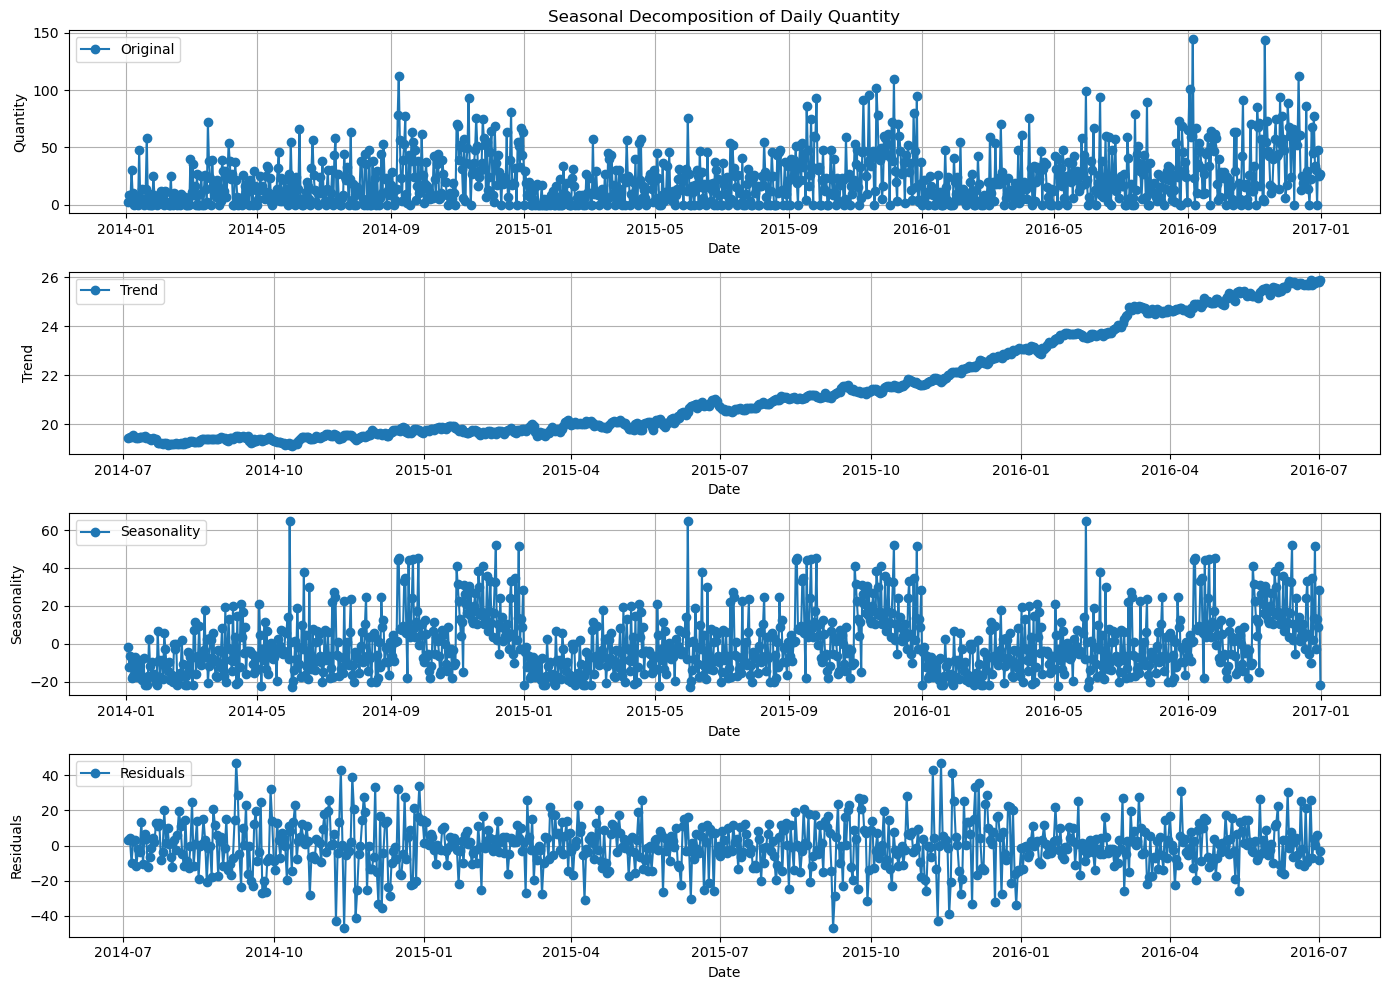

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29688D+00    |proj g|=  1.46200D-01

At iterate    5    f=  3.25316D+00    |proj g|=  8.00161D-03

At iterate   10    f=  3.25191D+00    |proj g|=  7.16605D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   7.166D-06   3.252D+00
  F =   3.2519055773149570     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

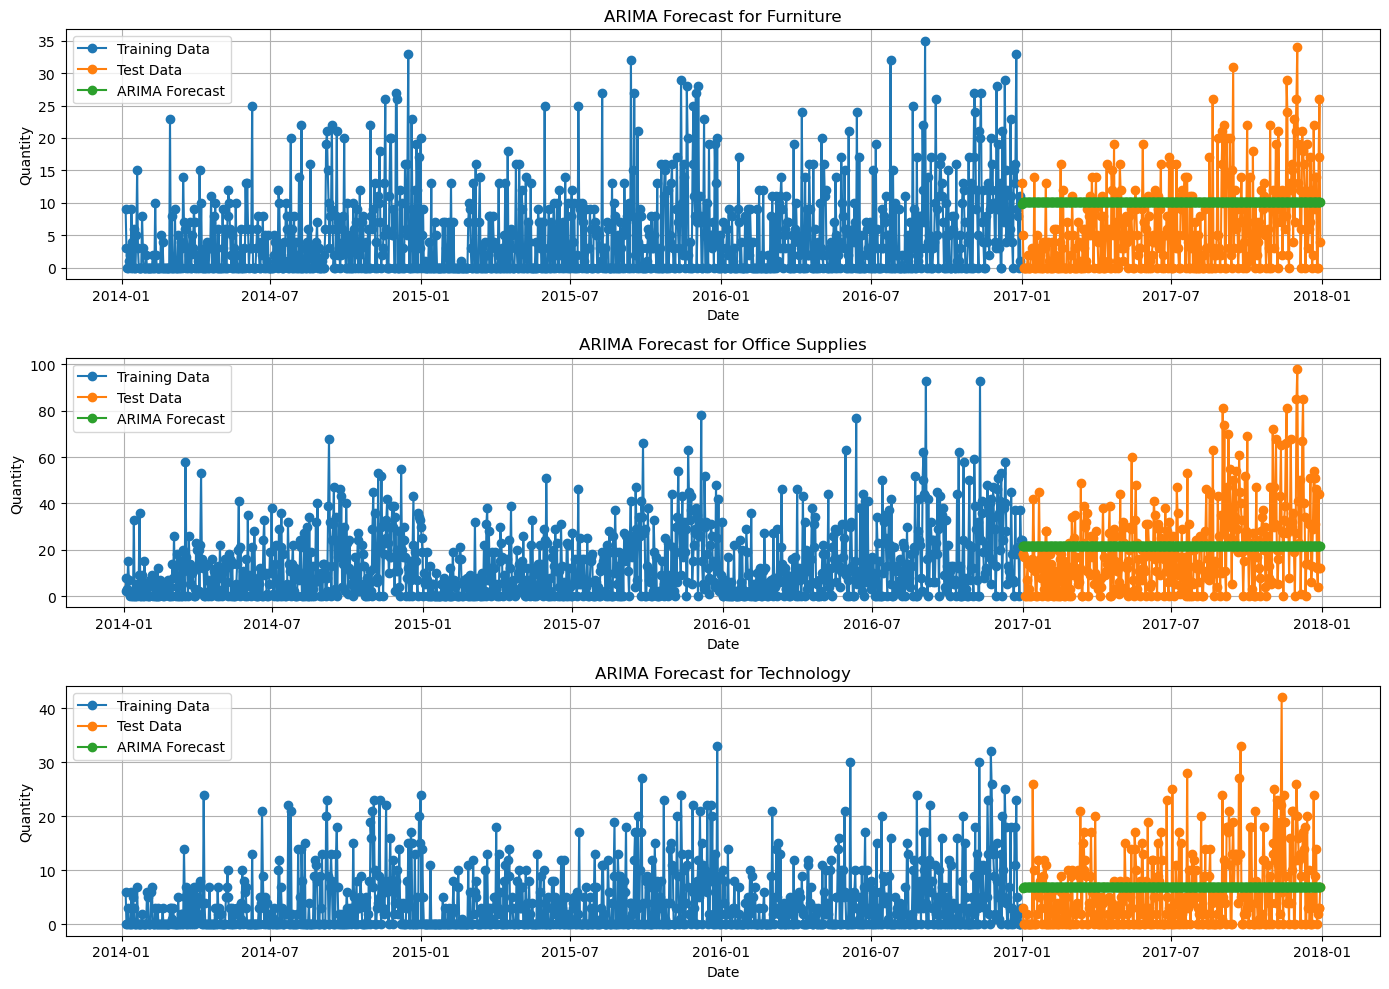

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42408D+00    |proj g|=  1.18793D-01


 This problem is unconstrained.



At iterate    5    f=  3.20968D+00    |proj g|=  7.94995D-03

At iterate   10    f=  3.20850D+00    |proj g|=  4.38156D-03

At iterate   15    f=  3.20848D+00    |proj g|=  1.93952D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     21      1     0     0   1.940D-05   3.208D+00
  F =   3.2084824115900035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.17149D+00    |proj g|=  8.63817D-02


 This problem is unconstrained.



At iterate    5    f=  4.03020D+00    |proj g|=  5.77827D-02

At iterate   10    f=  3.96648D+00    |proj g|=  5.44378D-03

At iterate   15    f=  3.96041D+00    |proj g|=  2.40555D-03

At iterate   20    f=  3.96039D+00    |proj g|=  7.01142D-04

At iterate   25    f=  3.96016D+00    |proj g|=  1.83939D-02

At iterate   30    f=  3.95993D+00    |proj g|=  1.52898D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     46      1     0     0   5.166D-06   3.960D+00
  F =   3.9599299021854866     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  3.13128D+00    |proj g|=  1.30508D-01

At iterate   10    f=  3.09986D+00    |proj g|=  1.17971D-02

At iterate   15    f=  3.09735D+00    |proj g|=  1.50765D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     22      1     0     0   1.517D-05   3.097D+00
  F =   3.0973532290155270     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


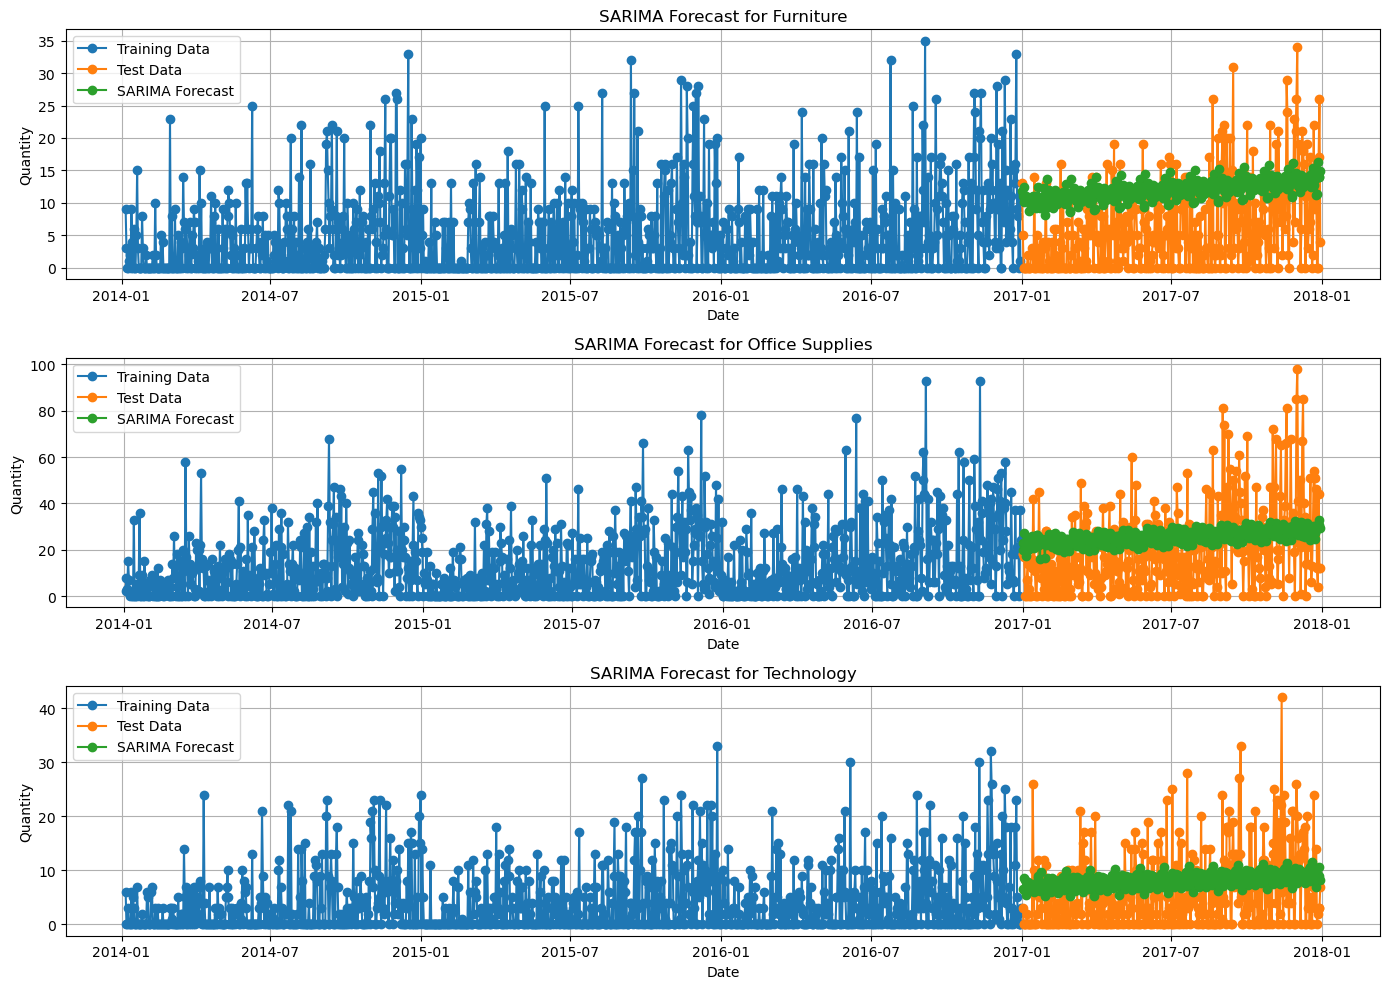

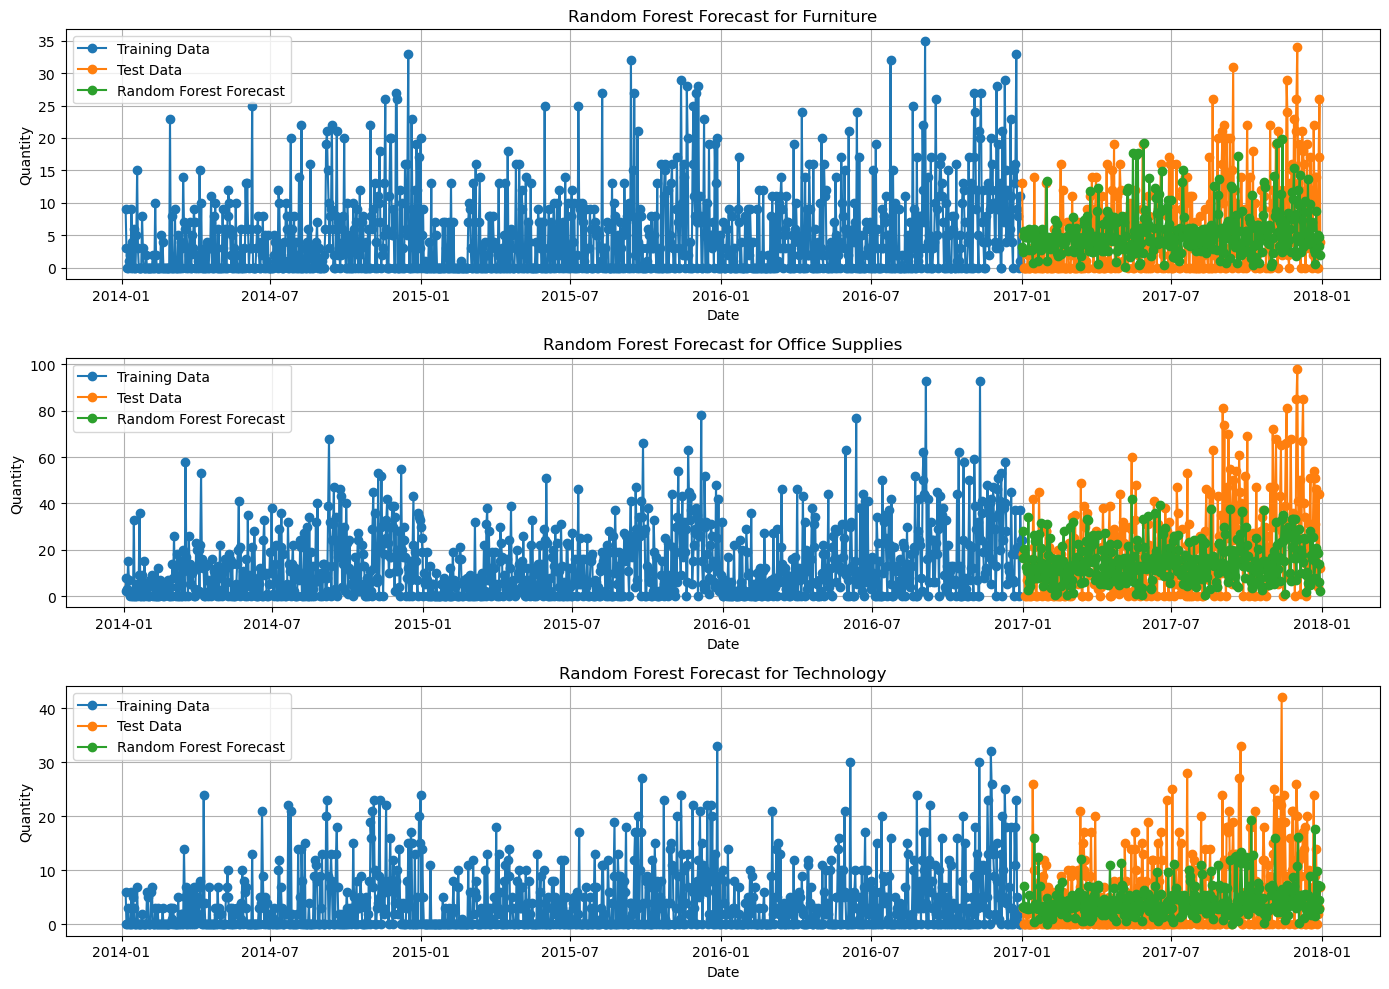

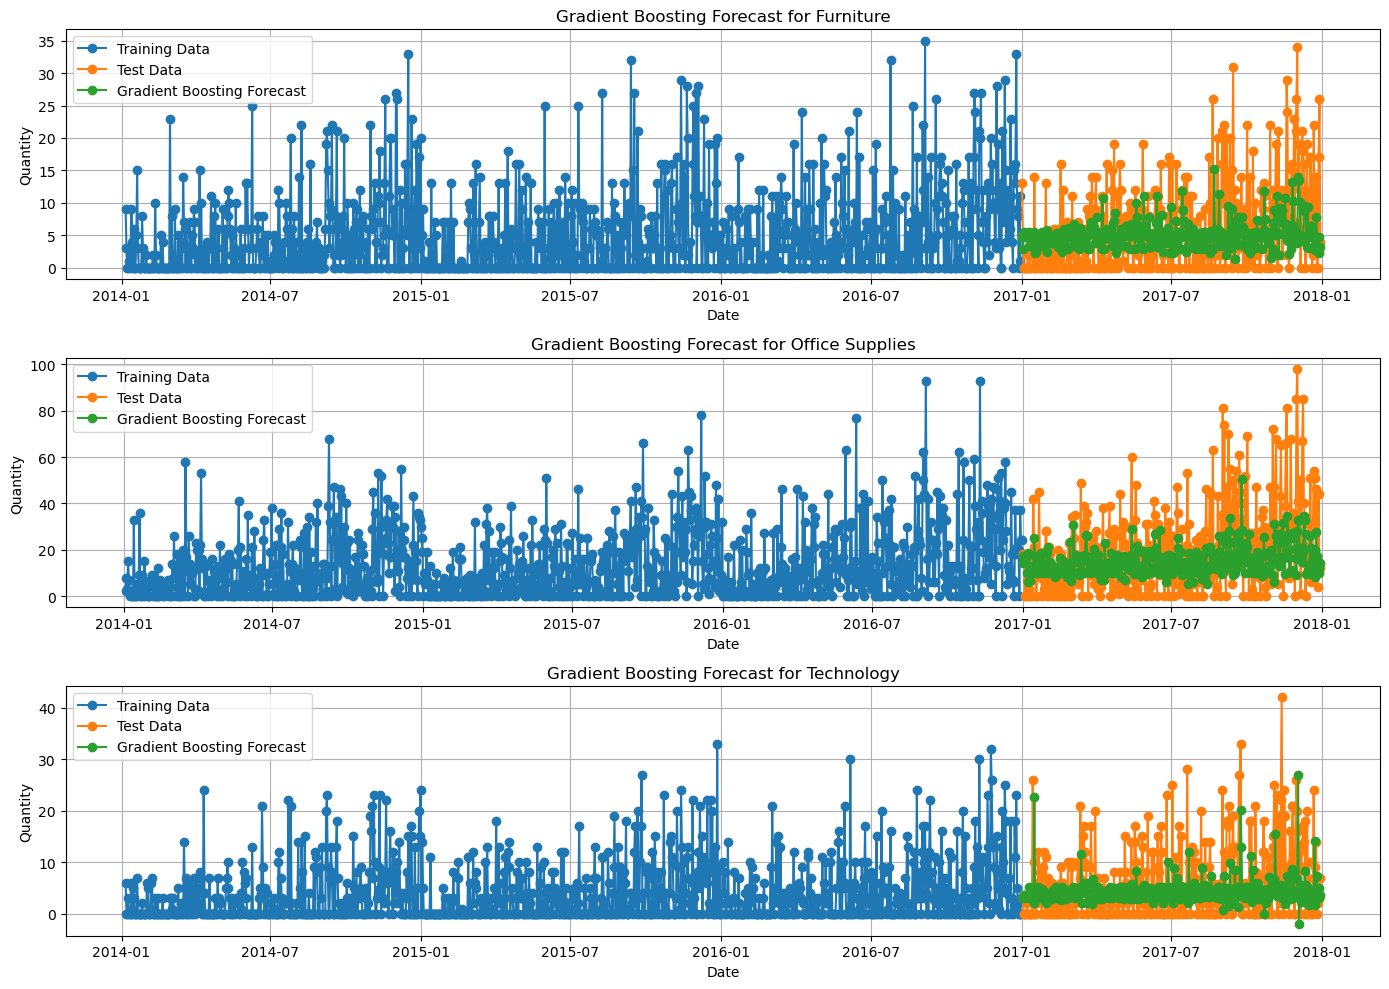

16:24:00 - cmdstanpy - INFO - Chain [1] start processing
16:24:00 - cmdstanpy - INFO - Chain [1] done processing
16:24:00 - cmdstanpy - INFO - Chain [1] start processing
16:24:01 - cmdstanpy - INFO - Chain [1] done processing
16:24:01 - cmdstanpy - INFO - Chain [1] start processing
16:24:01 - cmdstanpy - INFO - Chain [1] done processing


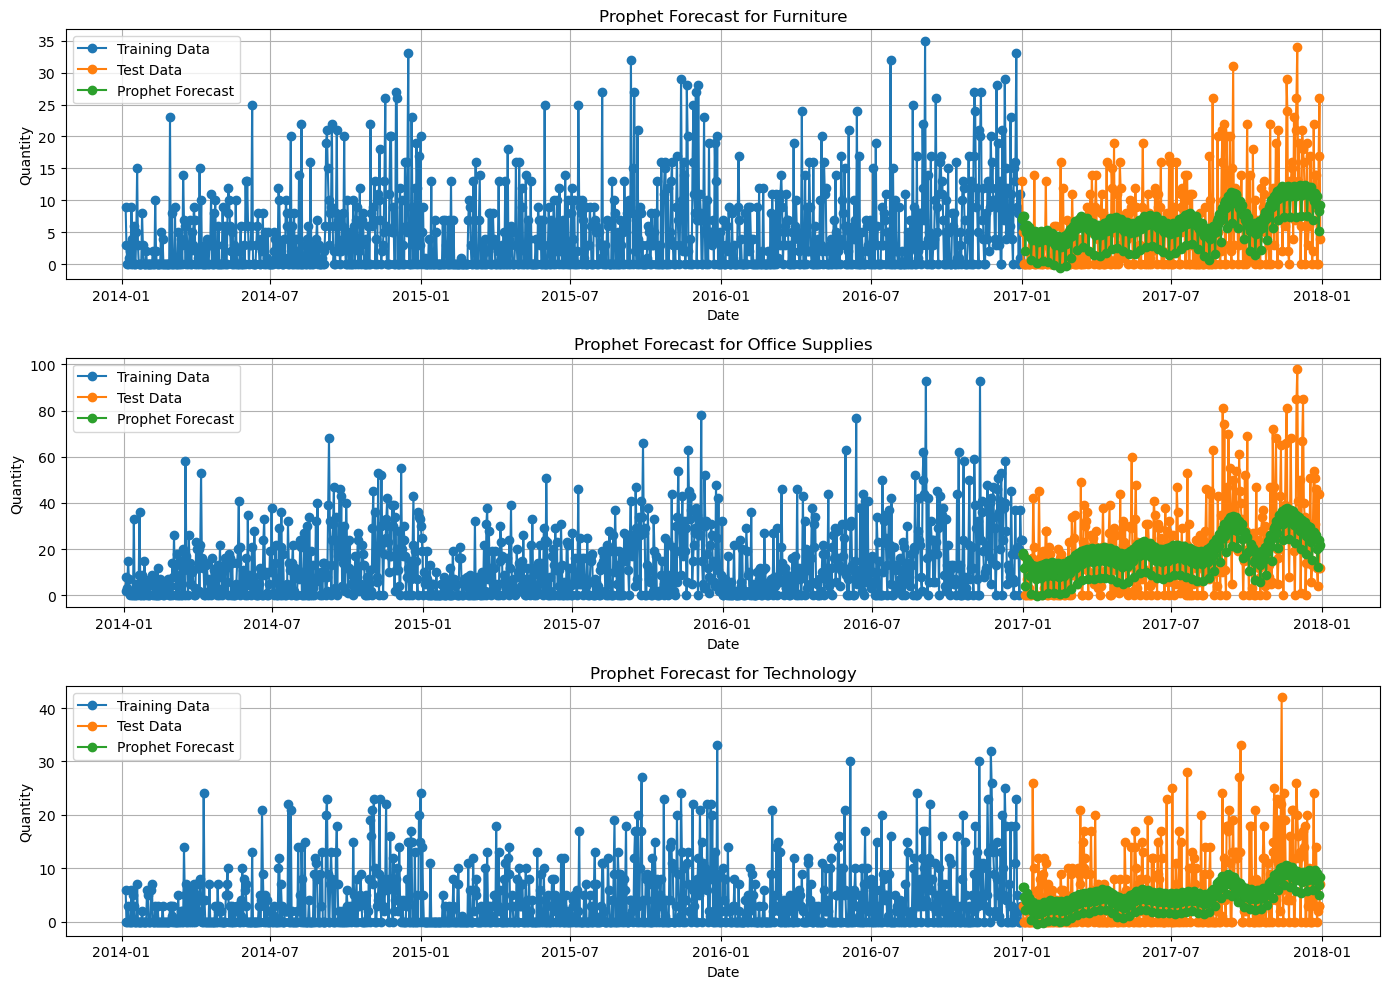


Metrics for all models:
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29688D+00    |proj g|=  1.46200D-01

At iterate    5    f=  3.25316D+00    |proj g|=  8.00161D-03

At iterate   10    f=  3.25191D+00    |proj g|=  7.16605D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   7.166D-06   3.252D+00
  F =   3.2519055773149570     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


In [8]:
# Load the cleaned data
df = pd.read_csv('superstore_cleaned.csv', encoding='ISO-8859-1')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Split the data into training and testing sets
train_end = '2016-12-31'
test_start = '2017-01-01'

train_data = df[df.index <= train_end]
test_data = df[df.index >= test_start]

# Function to evaluate metrics
def evaluate_metrics(test, pred):
    mae = mean_absolute_error(test, pred)
    mse = mean_squared_error(test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(test, pred)
    return mae, mse, rmse, r2

# Seasonal decomposition
daily_data = train_data['Quantity'].resample('D').sum()
decomposition = seasonal_decompose(daily_data, model='additive', period=365)

# Plot seasonal decomposition
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(daily_data.index, daily_data.values, label='Original', marker='o', linestyle='-')
plt.legend(loc='upper left')
plt.title('Seasonal Decomposition of Daily Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)

plt.subplot(412)
plt.plot(daily_data.index, decomposition.trend, label='Trend', marker='o', linestyle='-')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.grid(True)

plt.subplot(413)
plt.plot(daily_data.index, decomposition.seasonal, label='Seasonality', marker='o', linestyle='-')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.grid(True)

plt.subplot(414)
plt.plot(daily_data.index, decomposition.resid, label='Residuals', marker='o', linestyle='-')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

# Categories to consider
categories = df['Category'].unique()

# Function to create lag features
def create_lag_features(data, lags):
    df_lag = pd.DataFrame(index=data.index)
    for lag in lags:
        df_lag[f'lag_{lag}'] = data.shift(lag)
    return df_lag

# Plot function for each model
def plot_model_forecast(train_data, test_data, model_name, model_func):
    plt.figure(figsize=(14, 10))
    for i, category in enumerate(categories):
        plt.subplot(len(categories), 1, i+1)
        cat_train = train_data[train_data['Category'] == category]['Quantity'].resample('D').sum()
        cat_test = test_data[test_data['Category'] == category]['Quantity'].resample('D').sum()
        if len(cat_train) == 0 or len(cat_test) == 0:
            continue
        model = model_func(cat_train, cat_test)
        pred = model['pred']

        # Ensure length of predictions matches the length of test data
        if len(pred) != len(cat_test):
            pred = pred[:len(cat_test)]

        plt.plot(cat_train.index, cat_train.values, label='Training Data', marker='o', linestyle='-')
        plt.plot(cat_test.index, cat_test.values, label='Test Data', marker='o', linestyle='-')
        plt.plot(cat_test.index, pred, label=f'{model_name} Forecast', marker='o', linestyle='-')
        plt.title(f'{model_name} Forecast for {category}')
        plt.xlabel('Date')
        plt.ylabel('Quantity')
        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    plt.show()

# ARIMA model function
def arima_model_func(train_data, test_data):
    model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
    result = model.fit()
    forecast = result.get_forecast(steps=len(test_data))
    pred = forecast.predicted_mean
    return {'model': model, 'pred': pred}

# SARIMA model function
def sarima_model_func(train_data, test_data):
    model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
    result = model.fit()
    forecast = result.get_forecast(steps=len(test_data))
    pred = forecast.predicted_mean
    return {'model': model, 'pred': pred}

# Random Forest model function with lag features
def rf_model_func(train_data, test_data):
    lags = [1, 2, 3]  # Define lags
    train_lagged = create_lag_features(train_data, lags).dropna()
    X_train = train_lagged.iloc[:, :-1]
    y_train = train_lagged.iloc[:, -1]
    
    test_lagged = create_lag_features(pd.concat([train_data, test_data]), lags).dropna().iloc[-len(test_data):]
    X_test = test_lagged.iloc[:, :-1]
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return {'model': model, 'pred': pred}

# Gradient Boosting model function with lag features
def gb_model_func(train_data, test_data):
    lags = [1, 2, 3]  # Define lags
    train_lagged = create_lag_features(train_data, lags).dropna()
    X_train = train_lagged.iloc[:, :-1]
    y_train = train_lagged.iloc[:, -1]
    
    test_lagged = create_lag_features(pd.concat([train_data, test_data]), lags).dropna().iloc[-len(test_data):]
    X_test = test_lagged.iloc[:, :-1]
    
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return {'model': model, 'pred': pred}

# Prophet model function
def prophet_model_func(train_data, test_data):
    prophet_data = pd.DataFrame({'ds': train_data.index, 'y': train_data.values})
    m = Prophet(daily_seasonality=True)
    m.fit(prophet_data)
    future = m.make_future_dataframe(periods=len(test_data))
    forecast = m.predict(future)
    forecast.set_index('ds', inplace=True)
    pred = forecast.loc[train_data.index[-1] + pd.to_timedelta(np.arange(1, len(test_data) + 1), unit='D'), 'yhat'].values
    return {'model': m, 'pred': pred}

# Plot forecasts for each model
plot_model_forecast(train_data, test_data, 'ARIMA', arima_model_func)
plot_model_forecast(train_data, test_data, 'SARIMA', sarima_model_func)
plot_model_forecast(train_data, test_data, 'Random Forest', rf_model_func)
plot_model_forecast(train_data, test_data, 'Gradient Boosting', gb_model_func)
plot_model_forecast(train_data, test_data, 'Prophet', prophet_model_func)

# Calculate and print metrics
def print_metrics(model_name, model_func):
    metrics = []
    for category in categories:
        cat_train = train_data[train_data['Category'] == category]['Quantity'].resample('D').sum()
        cat_test = test_data[test_data['Category'] == category]['Quantity'].resample('D').sum()
        if len(cat_train) == 0 or len(cat_test) == 0:
            continue
        model = model_func(cat_train, cat_test)
        pred = model['pred']

        # Ensure length of predictions matches the length of test data
        if len(pred) != len(cat_test):
            pred = pred[:len(cat_test)]

        mae, mse, rmse, r2 = evaluate_metrics(cat_test.values, pred)
        metrics.append({'Category': category, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r2})

    print(f"\n{model_name} Metrics:")
    for metric in metrics:
        print(f"  Category: {metric['Category']}")
        print(f"    MAE: {metric['MAE']}")
        print(f"    MSE: {metric['MSE']}")
        print(f"    RMSE: {metric['RMSE']}")
        print(f"    R2 Score: {metric['R2 Score']}")

# Print metrics for each model
print("\nMetrics for all models:")
print_metrics('ARIMA', arima_model_func)


Predicting daily sales quantities for the data filtered for Holidays and Promotions

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15243D+00    |proj g|=  1.09725D-01

At iterate    5    f=  3.09752D+00    |proj g|=  9.58752D-03

At iterate   10    f=  3.09187D+00    |proj g|=  2.77484D-03

At iterate   15    f=  3.09161D+00    |proj g|=  6.25160D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     20      1     0     0   7.042D-06   3.092D+00
  F =   3.0916113915713330     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26354D+00    |proj g|=  8.33031D-02

At iterate    5    f=  3.08515D+00    |proj g|=  7.47956D-02

At iterate   10    f=  3.06178D+00    |proj g|=  2.75961D-02

At iterate   15    f=  3.05767D+00    |proj g|=  5.58716D-03

At iterate   20    f=  3.05762D+00    |proj g|=  2.03944D-04

At iterate   25    f=  3.05753D+00    |proj g|=  1.06534D-03

At iterate   30    f=  3.05751D+00    |proj g|=  1.06916D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

16:24:20 - cmdstanpy - INFO - Chain [1] start processing
16:24:20 - cmdstanpy - INFO - Chain [1] done processing


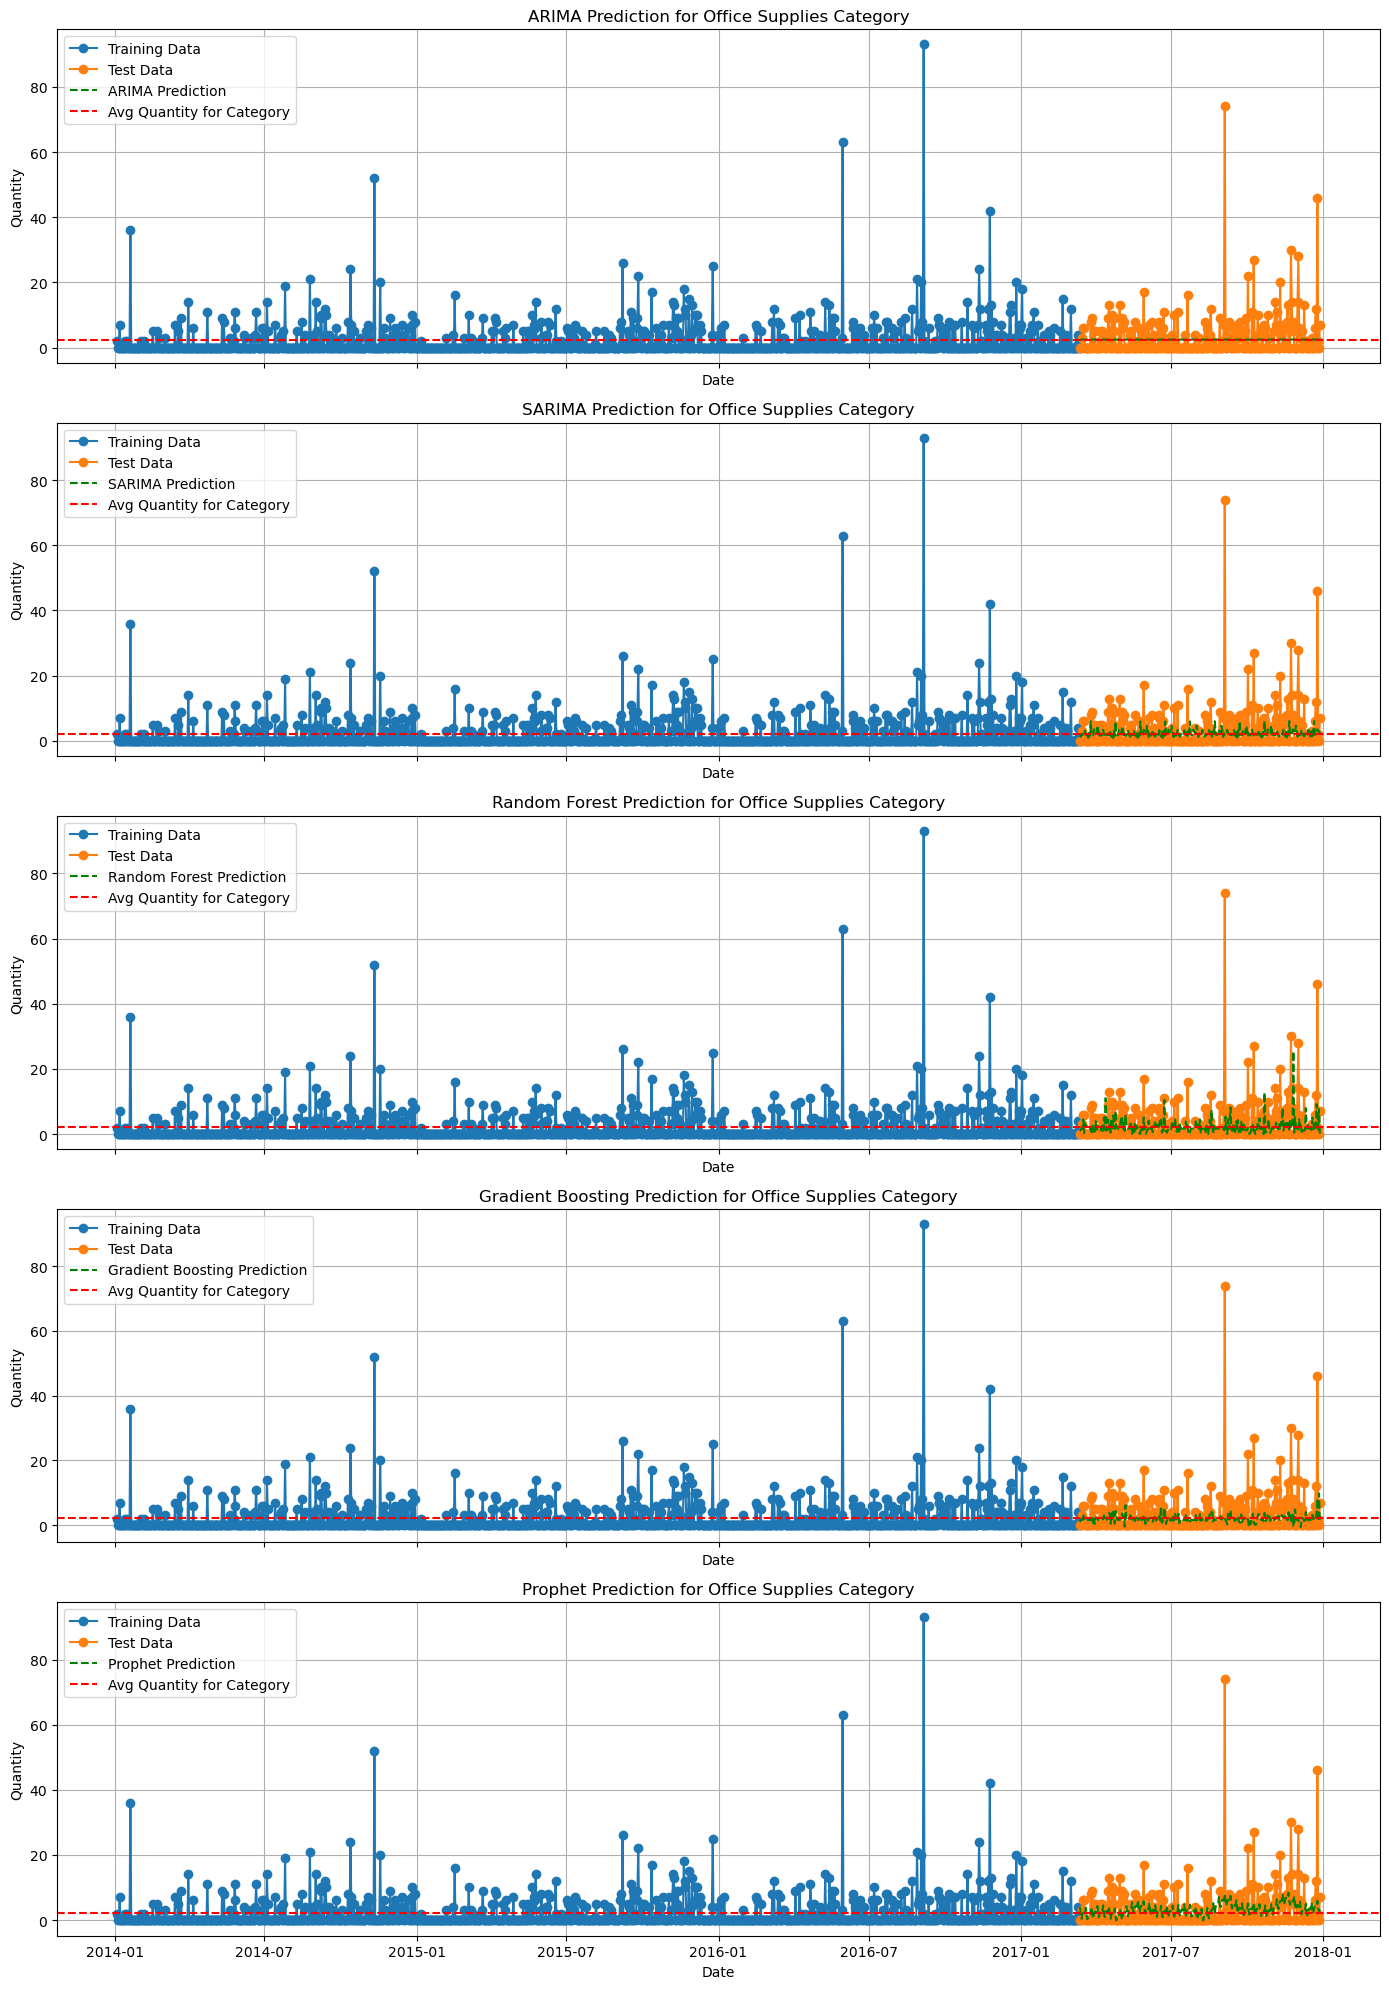


Evaluation Metrics for Office Supplies Category:
ARIMA - RMSE: 6.871267330152468, MAE: 3.773228239953056, MSE: 47.21431472242062, R2 Score: -0.013663229694893753
SARIMA - RMSE: 6.990760798817741, MAE: 3.810729277407604, MSE: 48.87073654628686, R2 Score: -0.0492256201603436
Random Forest - RMSE: 7.14061167041866, MAE: 3.826532237734461, MSE: 50.98833502771916, R2 Score: -0.09468919891829919
Gradient Boosting - RMSE: 6.9106411087208395, MAE: 3.6613309843597612, MSE: 47.7569605335424, R2 Score: -0.025313512214421685
Prophet - RMSE: 6.498526316208656, MAE: 3.8020829946459718, MSE: 42.23084428245644, R2 Score: 0.09332891391582976
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30521D+00    |proj g|=  1.27546D-01

At iterate    5    f=  2.25817D+00    |proj g|=  8.05574D-03

At iterate   10    f=  2.25072D+00    |proj g|=  4.59911D-03


 This problem is unconstrained.



At iterate   15    f=  2.25037D+00    |proj g|=  3.87237D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     17      1     0     0   3.872D-06   2.250D+00
  F =   2.2503680999455526     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.43608D+00    |proj g|=  1.12370D-01


 This problem is unconstrained.



At iterate    5    f=  2.26558D+00    |proj g|=  4.01789D-02

At iterate   10    f=  2.24040D+00    |proj g|=  6.64730D-03

At iterate   15    f=  2.23862D+00    |proj g|=  2.24660D-03

At iterate   20    f=  2.23843D+00    |proj g|=  4.56595D-03

At iterate   25    f=  2.23839D+00    |proj g|=  4.47022D-04

At iterate   30    f=  2.23839D+00    |proj g|=  4.07783D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     43      1     0     0   3.445D-04   2.238D+00
  F =   2.2383857401838516     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


16:24:47 - cmdstanpy - INFO - Chain [1] start processing
16:24:47 - cmdstanpy - INFO - Chain [1] done processing


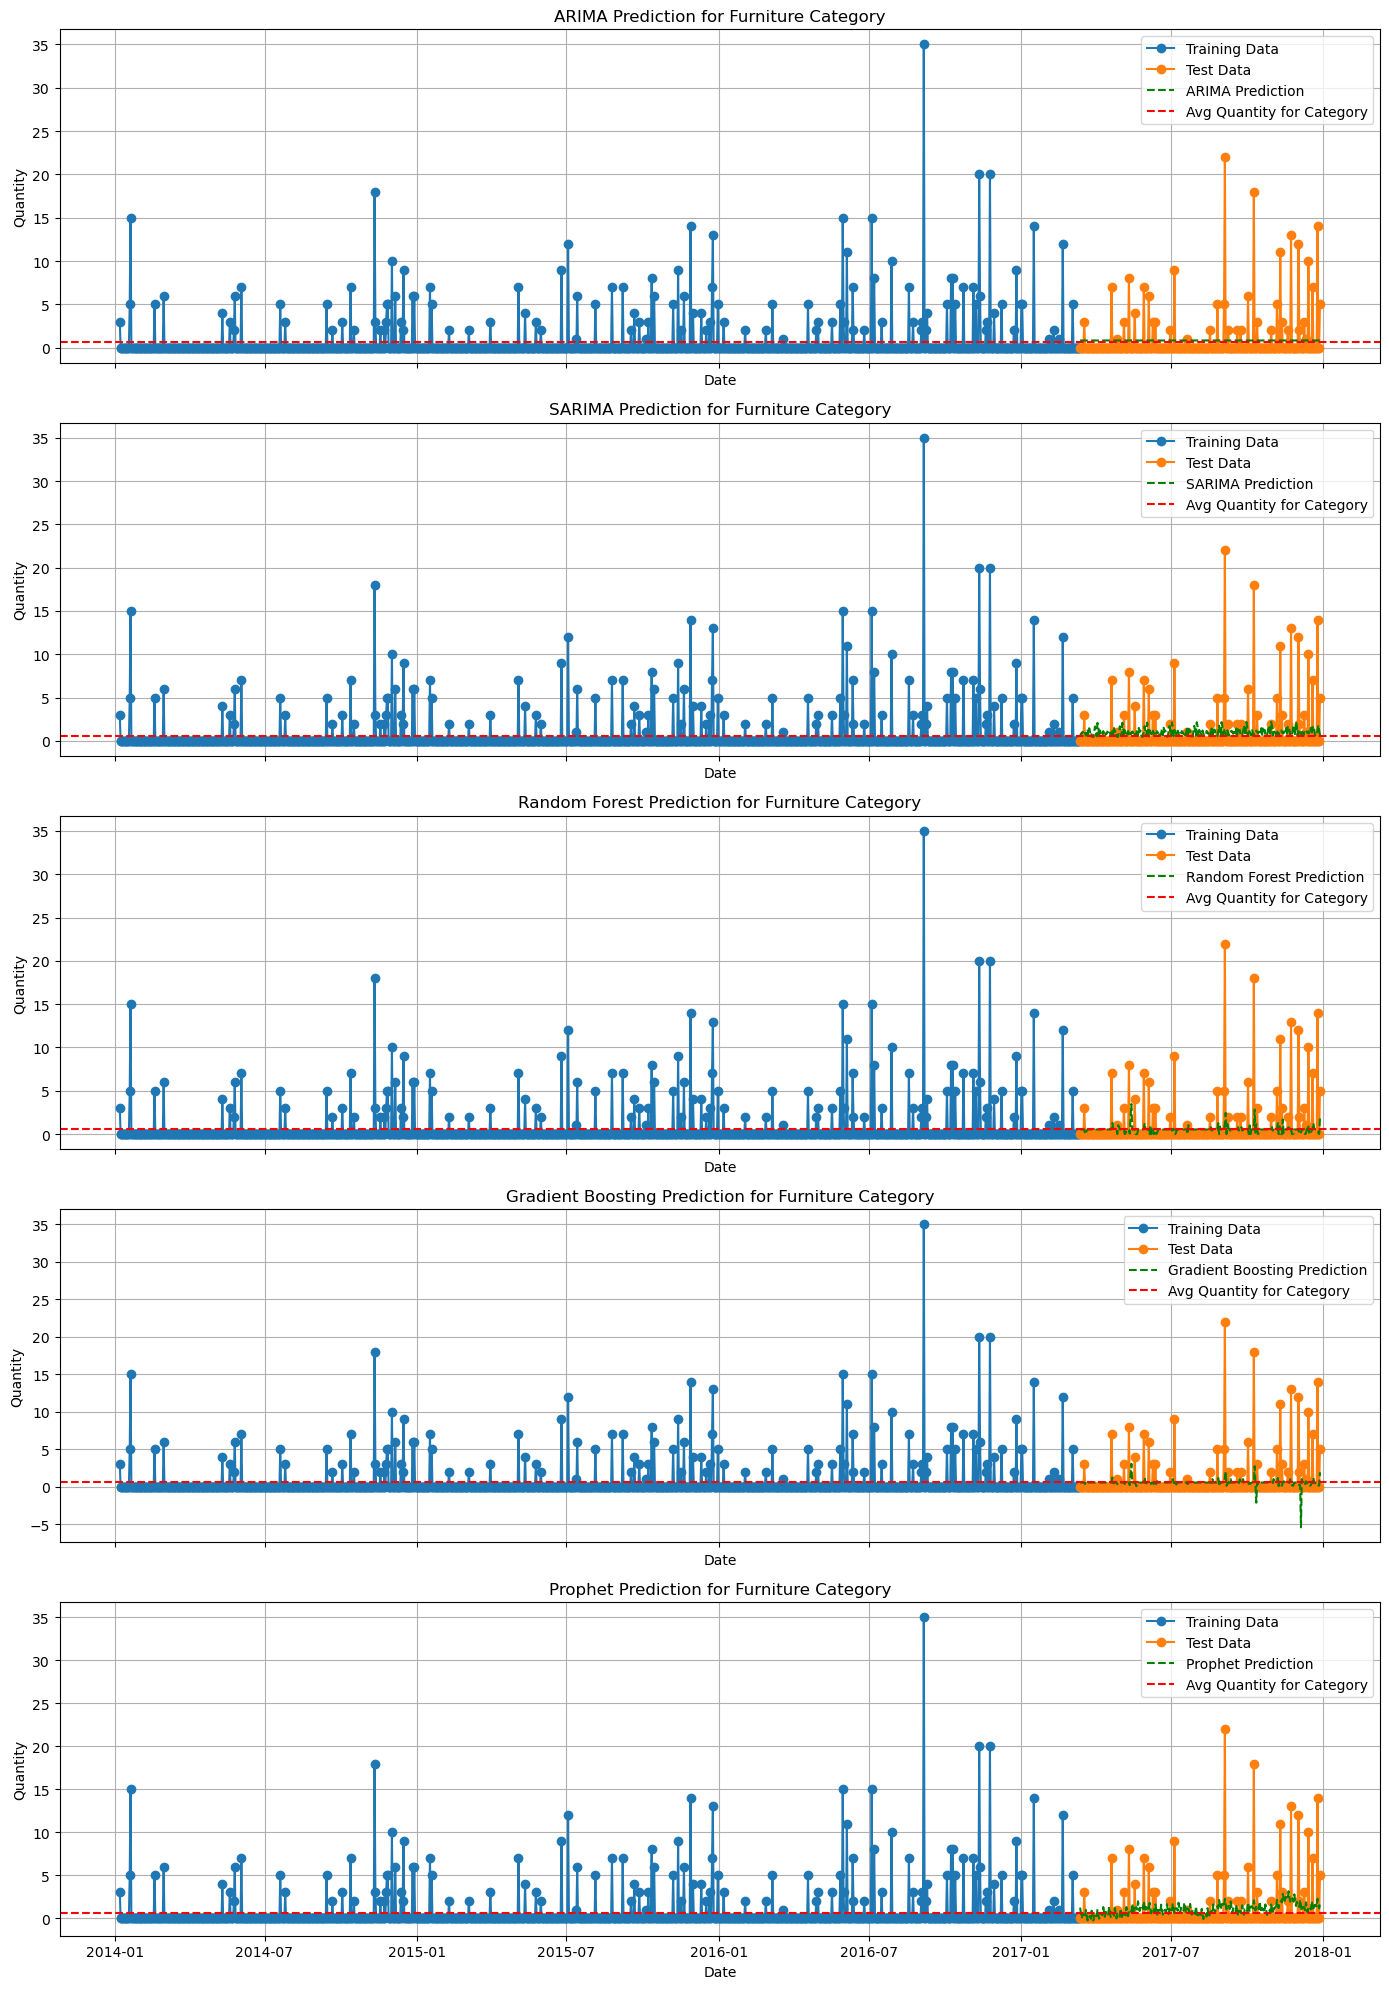


Evaluation Metrics for Furniture Category:
ARIMA - RMSE: 2.5960665345616256, MAE: 1.354295475026864, MSE: 6.739561451870808, R2 Score: -0.001320800241897624
SARIMA - RMSE: 2.647601919437019, MAE: 1.4929551991360244, MSE: 7.009795923806586, R2 Score: -0.04147050428778454
Random Forest - RMSE: 2.5995851896983058, MAE: 1.131843124162858, MSE: 6.757843158498777, R2 Score: -0.004036978919283785
Gradient Boosting - RMSE: 2.620657263167888, MAE: 1.1675112946112263, MSE: 6.867844490994604, R2 Score: -0.02038027114519303
Prophet - RMSE: 2.5248679972721324, MAE: 1.4586330249456825, MSE: 6.374958403648989, R2 Score: 0.05284958141027407
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.04037D+00    |proj g|=  1.16009D-01

At iterate    5    f=  1.99353D+00    |proj g|=  8.32251D-03

At iterate   10    f=  1.98245D+00    |proj g|=  1.54213D-03

At iterate  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19552D+00    |proj g|=  1.39005D-01


 This problem is unconstrained.



At iterate    5    f=  2.00650D+00    |proj g|=  1.98844D-02

At iterate   10    f=  1.98272D+00    |proj g|=  8.07876D-03

At iterate   15    f=  1.97879D+00    |proj g|=  2.97984D-03

At iterate   20    f=  1.97837D+00    |proj g|=  8.65654D-04

At iterate   25    f=  1.97833D+00    |proj g|=  4.82707D-04

At iterate   30    f=  1.97832D+00    |proj g|=  4.44970D-04

At iterate   35    f=  1.97832D+00    |proj g|=  1.46522D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   40    f=  1.97832D+00    |proj g|=  6.31328D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     67      1     0     0   6.313D-04   1.978D+00
  F =   1.9783198303172853     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


16:25:17 - cmdstanpy - INFO - Chain [1] start processing
16:25:17 - cmdstanpy - INFO - Chain [1] done processing


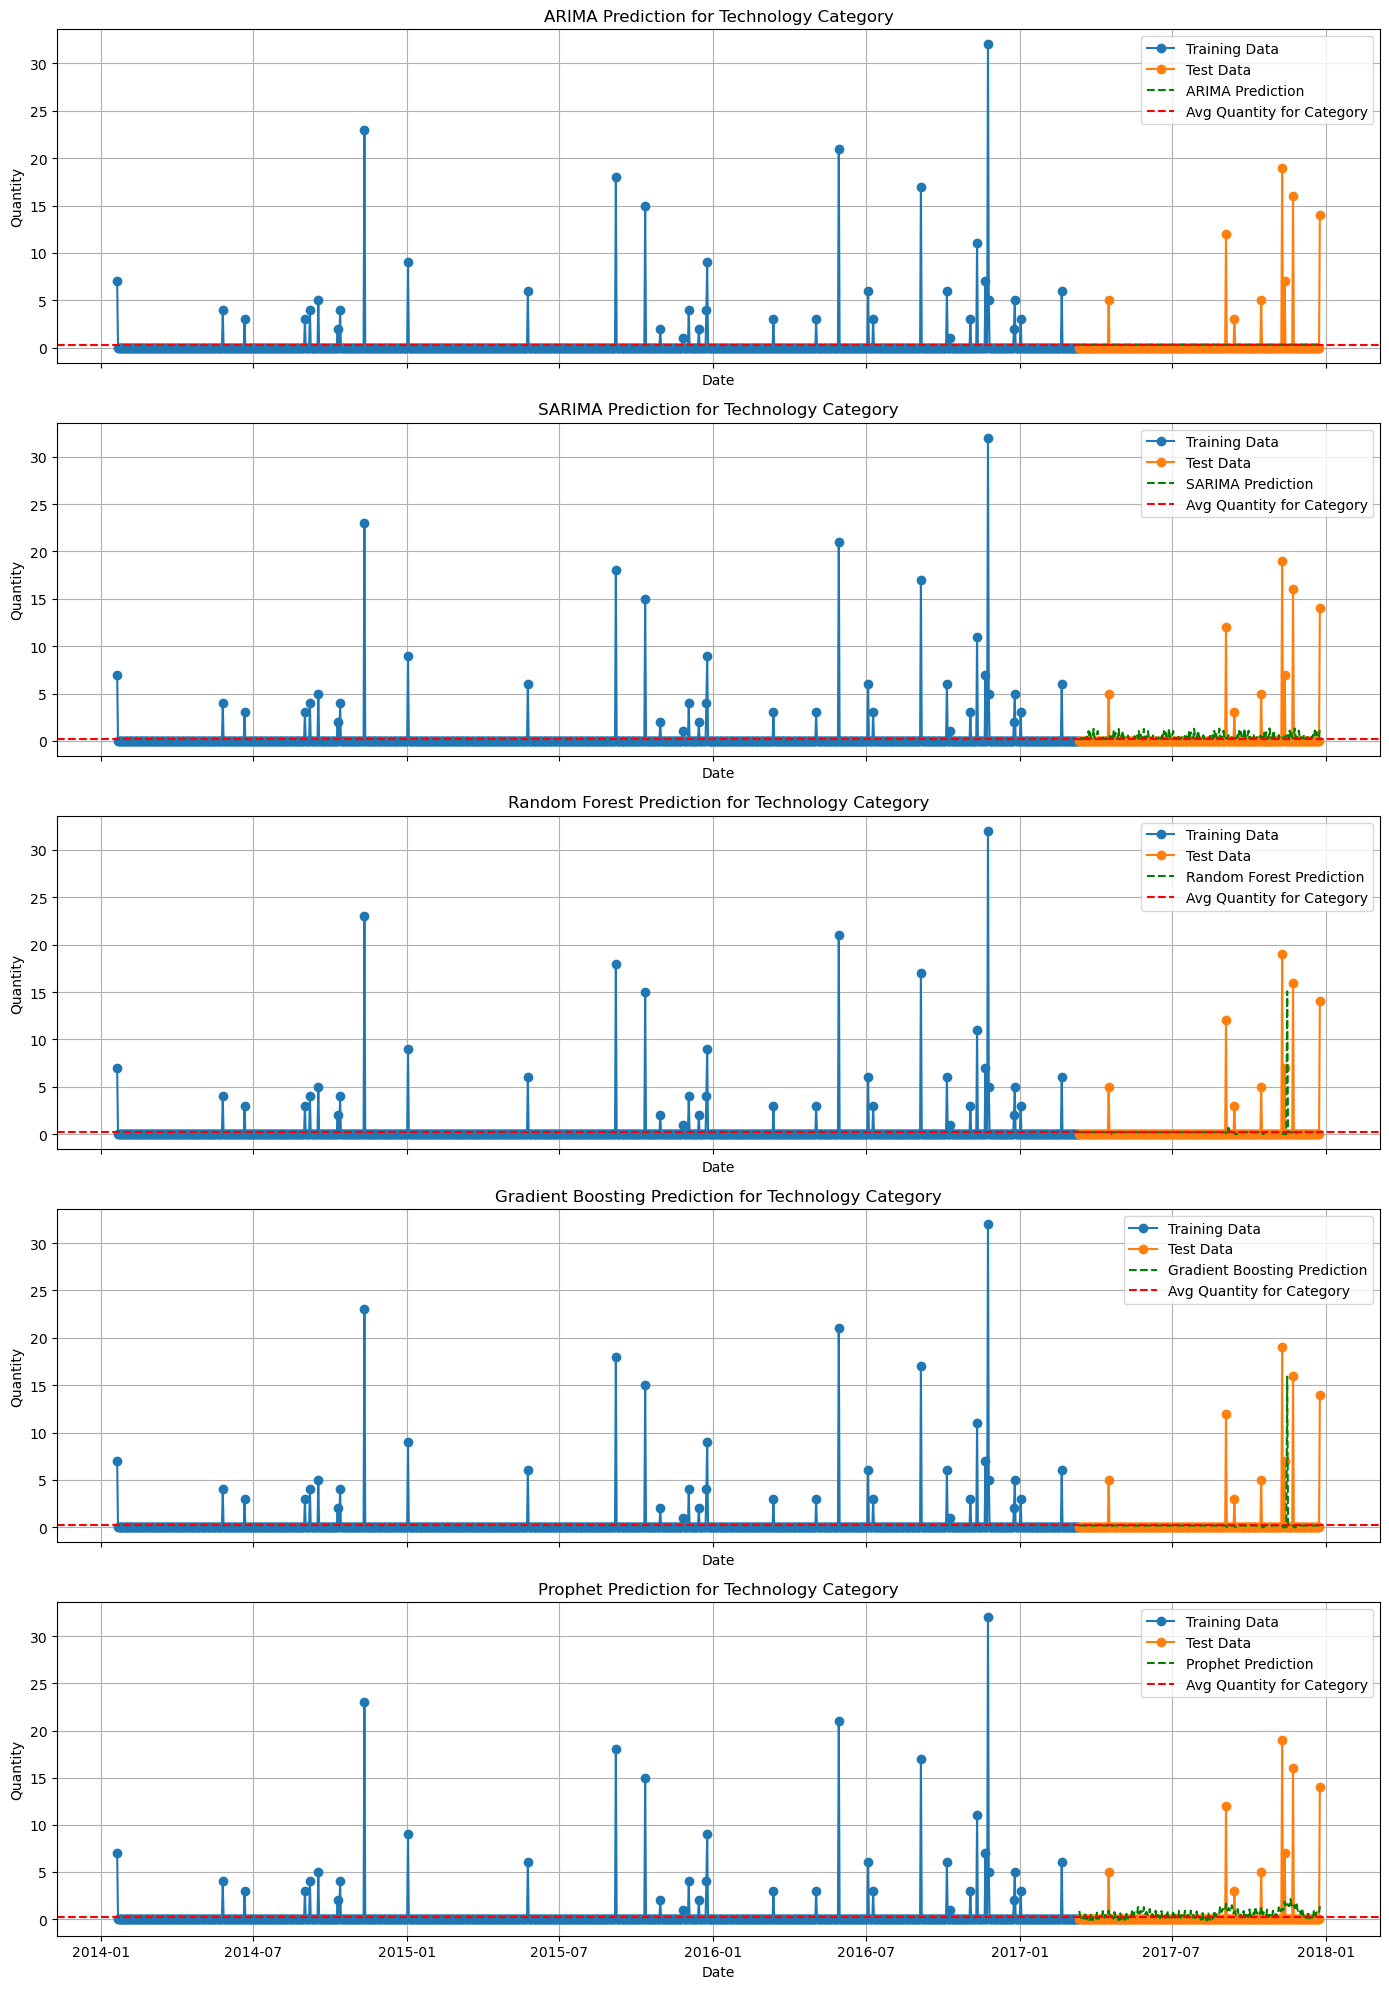


Evaluation Metrics for Technology Category:
ARIMA - RMSE: 1.9025124875155164, MAE: 0.5729813985750246, MSE: 3.6195537651524776, R2 Score: -0.00020411680744913951
SARIMA - RMSE: 1.9208565109682034, MAE: 0.6913271627729333, MSE: 3.6896897357289395, R2 Score: -0.01958503806416312
Random Forest - RMSE: 2.1030171647800393, MAE: 0.5084840917717988, MSE: 4.422681195359474, R2 Score: -0.222135165255402
Gradient Boosting - RMSE: 2.124374540013934, MAE: 0.5029551913281961, MSE: 4.512967186259413, R2 Score: -0.24708421302409955
Prophet - RMSE: 1.8327525510664795, MAE: 0.7193575155989681, MSE: 3.3589819134406884, R2 Score: 0.07180062624001127


In [9]:
# Load the cleaned data
df = pd.read_csv('superstore_cleaned.csv', encoding='ISO-8859-1')
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Define major US holidays
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=df['Order Date'].min(), end=df['Order Date'].max()).date.tolist()

# Identify promotion dates
promotion_dates = df[df['Discount'] > 0.5]['Order Date'].unique()

# Filter data for holidays or high discount
filtered_df = df[df['Order Date'].isin(holidays) | (df['Discount'] > 0.5)]

# Function to calculate evaluation metrics
def evaluate_metrics(test, pred):
    mae = mean_absolute_error(test, pred)
    mse = mean_squared_error(test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(test, pred)
    return rmse, mae, mse, r2

# Function to create lag features
def create_lag_features(data, lags):
    df_lag = pd.DataFrame(index=data.index)
    for lag in lags:
        df_lag[f'lag_{lag}'] = data.shift(lag)
    return df_lag.dropna()

# Function to plot forecasts in subplots
def plot_prediction_subplots(ax, train_data, test_data, forecasts, model_name, category_name, avg_quantity):
    ax.plot(train_data.index, train_data.values, label='Training Data', marker='o', linestyle='-')
    ax.plot(test_data.index, test_data.values, label='Test Data', marker='o', linestyle='-')
    ax.plot(test_data.index, forecasts, label=f'{model_name} Prediction', color='green', linestyle='--')
    ax.axhline(avg_quantity, color='red', linestyle='--', label='Avg Quantity for Category')
    ax.set_title(f'{model_name} Prediction for {category_name} Category')
    ax.set_xlabel('Date')
    ax.set_ylabel('Quantity')
    ax.legend()
    ax.grid(True)

# Loop through each category
categories = filtered_df['Category'].unique()

for category in categories:
    # Filter data for the category
    category_data = filtered_df[filtered_df['Category'] == category]

    # Group by Order Date and sum Quantity for daily data
    daily_data = category_data.groupby('Order Date')['Quantity'].sum().resample('D').sum().fillna(0)

    # Calculate the average quantity for the category
    avg_quantity_category = daily_data.mean()

    # Split the data into training and testing sets
    train_size = int(len(daily_data) * 0.8)
    train_data, test_data = daily_data[:train_size], daily_data[train_size:]

    # Create a figure with subplots
    fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(14, 20), sharex=True)

    # ARIMA model
    arima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
    arima_result = arima_model.fit()
    arima_pred = arima_result.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=True)
    arima_rmse, arima_mae, arima_mse, arima_r2 = evaluate_metrics(test_data, arima_pred)
    plot_prediction_subplots(axs[0], train_data, test_data, arima_pred, 'ARIMA', category, avg_quantity_category)

    # SARIMA model
    sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
    sarima_result = sarima_model.fit()
    sarima_pred = sarima_result.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=True)
    sarima_rmse, sarima_mae, sarima_mse, sarima_r2 = evaluate_metrics(test_data, sarima_pred)
    plot_prediction_subplots(axs[1], train_data, test_data, sarima_pred, 'SARIMA', category, avg_quantity_category)

    # Random Forest model with lag features
    lags = [1, 2, 3]
    train_lagged = create_lag_features(train_data, lags)
    X_train = train_lagged
    y_train = train_data.loc[train_lagged.index]

    test_lagged = create_lag_features(pd.concat([train_data, test_data]), lags).iloc[-len(test_data):]
    X_test = test_lagged

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_rmse, rf_mae, rf_mse, rf_r2 = evaluate_metrics(test_data.iloc[-len(rf_pred):], rf_pred)
    plot_prediction_subplots(axs[2], train_data, test_data, rf_pred, 'Random Forest', category, avg_quantity_category)

    # Gradient Boosting model with lag features
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gb_model.fit(X_train, y_train)
    gb_pred = gb_model.predict(X_test)
    gb_rmse, gb_mae, gb_mse, gb_r2 = evaluate_metrics(test_data.iloc[-len(gb_pred):], gb_pred)
    plot_prediction_subplots(axs[3], train_data, test_data, gb_pred, 'Gradient Boosting', category, avg_quantity_category)

    # Prophet model
    prophet_data = pd.DataFrame({'ds': train_data.index, 'y': train_data.values})
    m = Prophet(daily_seasonality=True)
    m.fit(prophet_data)
    future = m.make_future_dataframe(periods=len(test_data))
    forecast = m.predict(future)
    forecast = forecast.set_index('ds').loc[test_data.index]
    prophet_pred = forecast['yhat'].values
    prophet_rmse, prophet_mae, prophet_mse, prophet_r2 = evaluate_metrics(test_data, prophet_pred)
    plot_prediction_subplots(axs[4], train_data, test_data, prophet_pred, 'Prophet', category, avg_quantity_category)

    plt.tight_layout()
    plt.show()

    # Print evaluation metrics
    print(f"\nEvaluation Metrics for {category} Category:")
    print(f"ARIMA - RMSE: {arima_rmse}, MAE: {arima_mae}, MSE: {arima_mse}, R2 Score: {arima_r2}")
    print(f"SARIMA - RMSE: {sarima_rmse}, MAE: {sarima_mae}, MSE: {sarima_mse}, R2 Score: {sarima_r2}")
    print(f"Random Forest - RMSE: {rf_rmse}, MAE: {rf_mae}, MSE: {rf_mse}, R2 Score: {rf_r2}")
    print(f"Gradient Boosting - RMSE: {gb_rmse}, MAE: {gb_mae}, MSE: {gb_mse}, R2 Score: {gb_r2}")
    print(f"Prophet - RMSE: {prophet_rmse}, MAE: {prophet_mae}, MSE: {prophet_mse}, R2 Score: {prophet_r2}")

Hybrid Model using 3 best performing models from previous steps 
1. Prophet
2. SARIMA
3. Random Forest

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19276D+00    |proj g|=  1.70138D-01

At iterate    5    f=  3.13426D+00    |proj g|=  4.78281D-02
  ys=-1.956E-02  -gs= 1.075E-02 BFGS update SKIPPED

At iterate   10    f=  3.08738D+00    |proj g|=  1.20701D-01

At iterate   15    f=  3.01479D+00    |proj g|=  2.70702D-01

At iterate   20    f=  3.01464D+00    |proj g|=  3.14032D-02

At iterate   25    f=  3.01447D+00    |proj g|=  6.79134D-03

At iterate   30    f=  3.01446D+00    |proj g|=  9.63508D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

   

10:00:27 - cmdstanpy - INFO - Chain [1] start processing
10:00:27 - cmdstanpy - INFO - Chain [1] done processing


Furniture Hybrid Model Evaluation:
MSE: 33.33
RMSE: 5.77
MAE: 4.42
R2 Score: 0.26


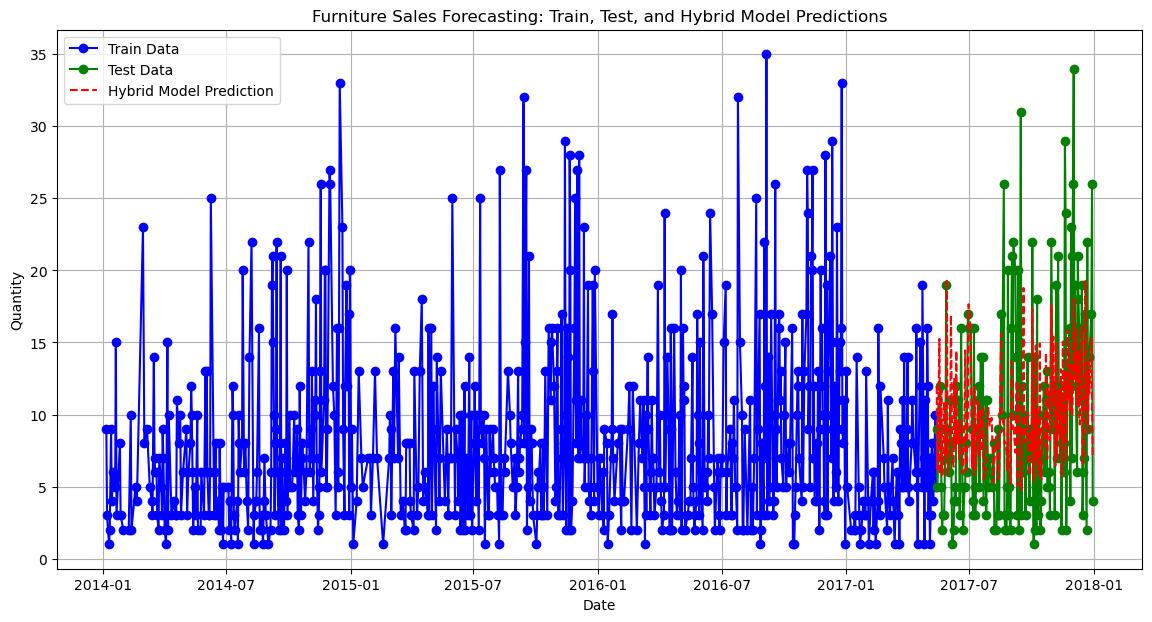

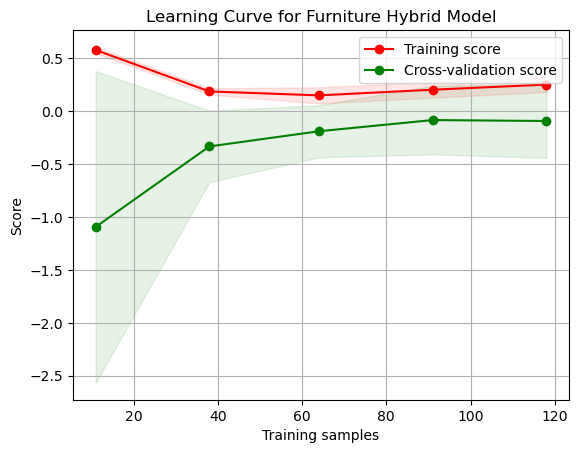

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95123D+00    |proj g|=  1.41337D-01


 This problem is unconstrained.



At iterate    5    f=  3.89971D+00    |proj g|=  6.78477D-02

At iterate   10    f=  3.88705D+00    |proj g|=  2.42964D-02

At iterate   15    f=  3.82018D+00    |proj g|=  4.05448D-01

At iterate   20    f=  3.77776D+00    |proj g|=  2.15148D-02

At iterate   25    f=  3.77768D+00    |proj g|=  8.47008D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     39      1     0     0   8.470D-05   3.778D+00
  F =   3.7776805717106612     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


10:00:40 - cmdstanpy - INFO - Chain [1] start processing
10:00:40 - cmdstanpy - INFO - Chain [1] done processing


Office Supplies Hybrid Model Evaluation:
MSE: 196.44
RMSE: 14.02
MAE: 10.48
R2 Score: 0.43


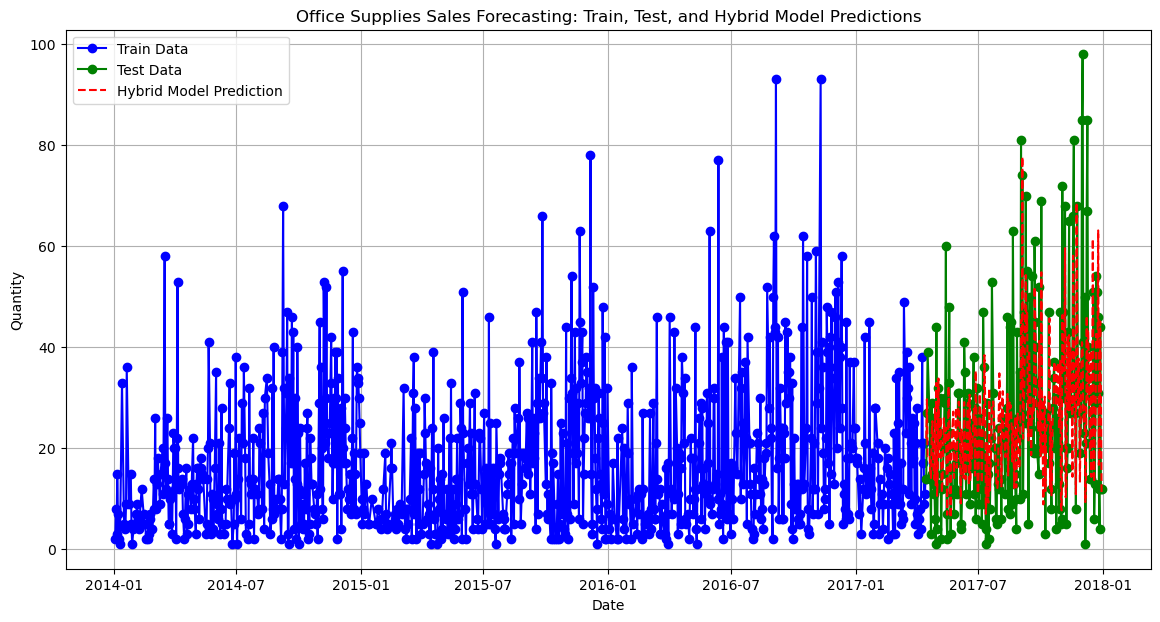

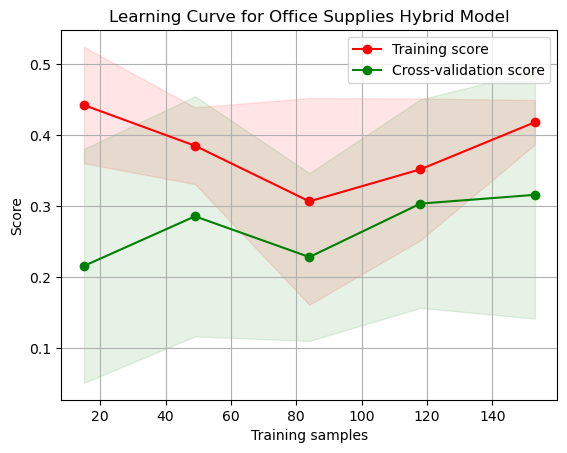

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11143D+00    |proj g|=  1.29047D-01


 This problem is unconstrained.



At iterate    5    f=  3.05780D+00    |proj g|=  7.65702D-02

At iterate   10    f=  3.01222D+00    |proj g|=  8.50319D-01

At iterate   15    f=  2.94441D+00    |proj g|=  5.42058D-01

At iterate   20    f=  2.93791D+00    |proj g|=  4.11624D-01

At iterate   25    f=  2.93735D+00    |proj g|=  2.34564D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     42      1     0     0   9.091D-05   2.937D+00
  F =   2.9373515284577256     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


10:00:50 - cmdstanpy - INFO - Chain [1] start processing
10:00:50 - cmdstanpy - INFO - Chain [1] done processing


Technology Hybrid Model Evaluation:
MSE: 37.62
RMSE: 6.13
MAE: 4.82
R2 Score: 0.32


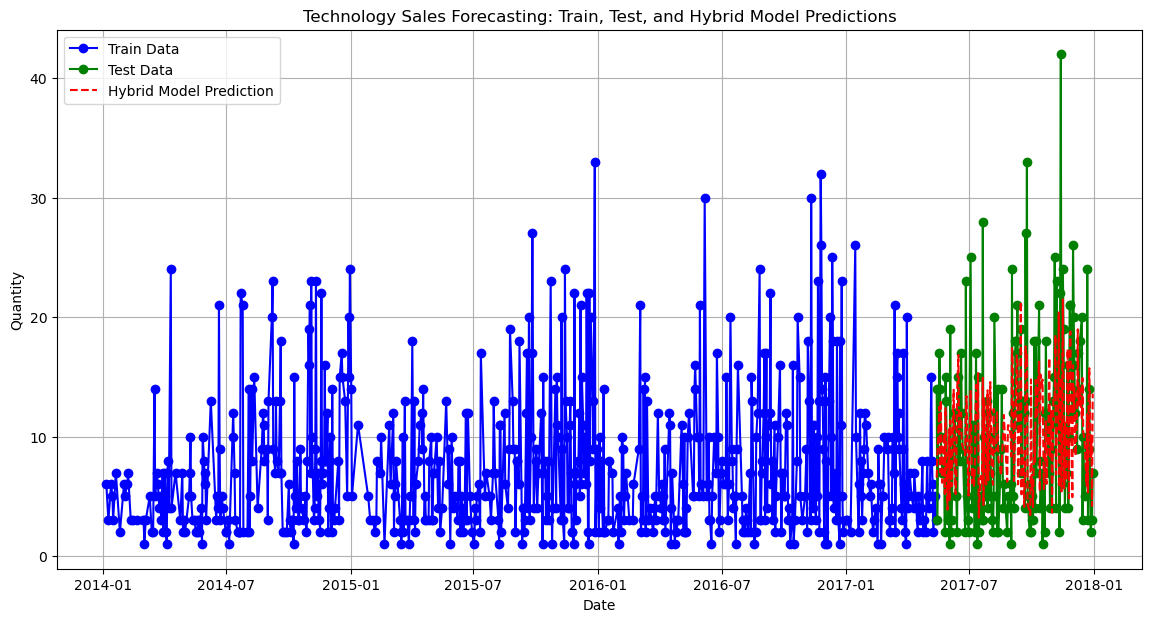

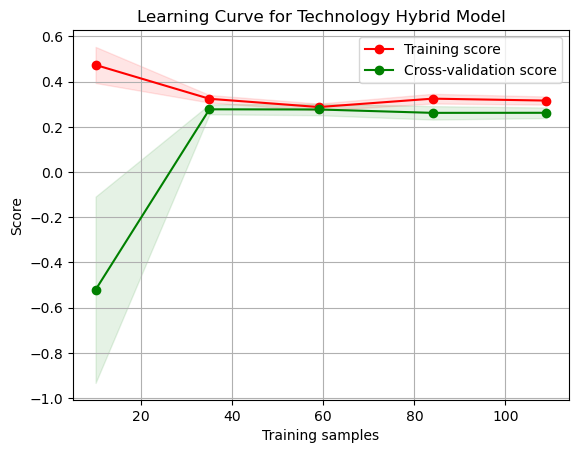

In [11]:
# Load and preprocess data
df = pd.read_csv('superstore_cleaned.csv', encoding='ISO-8859-1')
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Define categories
categories = ['Furniture', 'Office Supplies', 'Technology']

# Generate US holidays
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=df['Order Date'].min(), end=df['Order Date'].max())

# Function to add holiday and discount features
def add_features(df):
    df['is_holiday'] = df['Order Date'].isin(holidays).astype(int)
    df['high_discount'] = (df['Discount'] > 0.5).astype(int)
    df['day_of_week'] = df['Order Date'].dt.dayofweek
    df['month'] = df['Order Date'].dt.month
    df['lag_1'] = df['Quantity'].shift(1).fillna(0)  # Lagged feature
    df['rolling_mean_7'] = df['Quantity'].rolling(window=7).mean().fillna(0)  # Rolling mean
    return df

# Function to plot learning curves based on the number of training samples
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training samples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Function to process each category
def process_category(category):
    # Filter data by category
    category_data = df[df['Category'] == category]

    # Add features
    category_data = add_features(category_data)

    # Aggregate daily sales quantities
    daily_data = category_data.groupby('Order Date').agg({
        'Quantity': 'sum',
        'is_holiday': 'max',
        'high_discount': 'max',
        'day_of_week': 'max',
        'month': 'max',
        'lag_1': 'max',
        'rolling_mean_7': 'max'
    }).reset_index()
    daily_data.rename(columns={'Order Date': 'ds', 'Quantity': 'y'}, inplace=True)

    # Split data into train and test sets
    train_size = int(len(daily_data) * 0.8)
    train, test = daily_data[:train_size], daily_data[train_size:]

    # Feature and target for training
    X_train = train[['is_holiday', 'high_discount', 'day_of_week', 'month', 'lag_1', 'rolling_mean_7']]
    y_train = train['y']
    X_test = test[['is_holiday', 'high_discount', 'day_of_week', 'month', 'lag_1', 'rolling_mean_7']]
    y_test = test['y']

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # SARIMA model for seasonality and holidays
    sarima_model = SARIMAX(train['y'],
                           order=(1, 1, 1),
                           seasonal_order=(1, 1, 1, 30),
                           enforce_stationarity=False,
                           enforce_invertibility=False)
    sarima_result = sarima_model.fit()
    sarima_pred = sarima_result.predict(start=len(train), end=len(daily_data) - 1, dynamic=False)

    # Prophet model with holidays
    prophet_data = daily_data.copy()
    prophet_model = Prophet(holidays=pd.DataFrame({
        'holiday': 'US_Holidays',
        'ds': pd.to_datetime(holidays),
        'lower_window': 0,
        'upper_window': 1,
    }), daily_seasonality=True)
    prophet_model.fit(prophet_data)
    future = prophet_model.make_future_dataframe(periods=len(test))
    forecast = prophet_model.predict(future)
    prophet_pred = forecast['yhat'].values[-len(test):]

    # Random Forest model with Grid Search for hyperparameter tuning
    rf_model = RandomForestRegressor(random_state=42)
    rf_param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20]
    }
    rf_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='r2')
    rf_search.fit(X_train_scaled, y_train)
    rf_pred = rf_search.predict(X_test_scaled)

    # Create a DataFrame to hold predictions
    predictions = pd.DataFrame({
        'SARIMA': sarima_pred,
        'Prophet': prophet_pred,
        'RandomForest': rf_pred
    }, index=test.index)

    # Train the meta-model (Linear Regression as stacking) on predictions
    meta_model = LinearRegression()
    meta_model.fit(predictions, y_test)

    # Predict using the meta-model
    combined_pred = meta_model.predict(predictions)

    # Evaluation metrics
    def calculate_metrics(actual, pred):
        mse = mean_squared_error(actual, pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(actual, pred)
        r2 = r2_score(actual, pred)
        return mse, rmse, mae, r2

    # Calculate metrics for the hybrid model
    hybrid_mse, hybrid_rmse, hybrid_mae, hybrid_r2 = calculate_metrics(y_test, combined_pred)

    # Print metrics
    print(f"{category} Hybrid Model Evaluation:")
    print(f"MSE: {hybrid_mse:.2f}")
    print(f"RMSE: {hybrid_rmse:.2f}")
    print(f"MAE: {hybrid_mae:.2f}")
    print(f"R2 Score: {hybrid_r2:.2f}")

    # Plot actual vs. predicted
    plt.figure(figsize=(14, 7))

    # Plot train data
    plt.plot(train['ds'], train['y'], label='Train Data', color='blue', linestyle='-', marker='o')

    # Plot test data
    plt.plot(test['ds'], test['y'], label='Test Data', color='green', linestyle='-', marker='o')

    # Plot hybrid model prediction
    plt.plot(test['ds'], combined_pred, label='Hybrid Model Prediction', color='red', linestyle='--')

    plt.title(f'{category} Sales Forecasting: Train, Test, and Hybrid Model Predictions')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Learning curve for the hybrid model
    title = f"Learning Curve for {category} Hybrid Model"
    plot_learning_curve(meta_model, title, predictions, y_test, cv=3)
    plt.show()

# Process each category
for category in categories:
    process_category(category)


Predict future sales by category.

Predict future sales by sub categories

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.37653D+00    |proj g|=  1.68803D-01

At iterate    5    f=  3.30832D+00    |proj g|=  8.48761D-03

At iterate   10    f=  3.24803D+00    |proj g|=  3.52993D-02

At iterate   15    f=  3.24580D+00    |proj g|=  4.40114D-03

At iterate   20    f=  3.24556D+00    |proj g|=  2.18430D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   1.695D-05   3.246D+00
  F =   3.2455591361386111     

CONVERG

 This problem is unconstrained.
10:01:37 - cmdstanpy - INFO - Chain [1] start processing
10:01:38 - cmdstanpy - INFO - Chain [1] done processing


Furniture Hybrid Model Evaluation:
MSE: 116.06
RMSE: 10.77
MAE: 7.54
R2 Score: 0.98


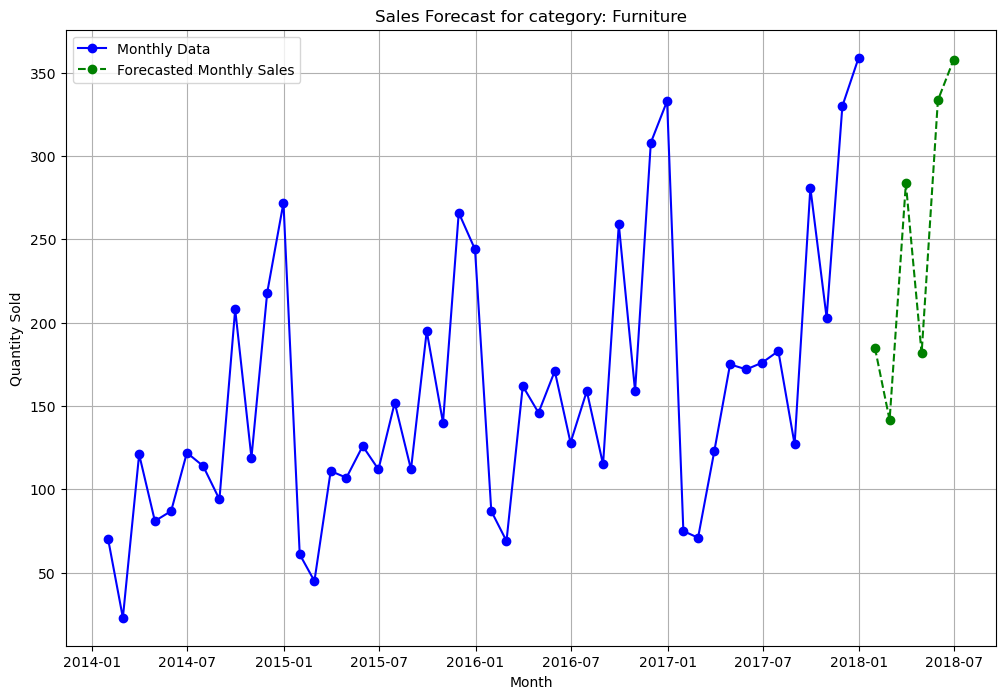

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95181D+00    |proj g|=  9.70692D-02

At iterate    5    f=  3.92385D+00    |proj g|=  1.49400D-02

At iterate   10    f=  3.92341D+00    |proj g|=  3.57721D-03

At iterate   15    f=  3.91213D+00    |proj g|=  4.43097D-02

At iterate   20    f=  3.90149D+00    |proj g|=  5.87746D-03

At iterate   25    f=  3.90039D+00    |proj g|=  2.37235D-03

At iterate   30    f=  3.90023D+00    |proj g|=  2.71838D-04


 This problem is unconstrained.



At iterate   35    f=  3.90021D+00    |proj g|=  3.57082D-04

At iterate   40    f=  3.90020D+00    |proj g|=  1.93656D-04

At iterate   45    f=  3.90020D+00    |proj g|=  8.29714D-05

At iterate   50    f=  3.90020D+00    |proj g|=  2.25972D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     57      1     0     0   2.260D-05   3.900D+00
  F =   3.9002013322028595     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


10:01:38 - cmdstanpy - INFO - Chain [1] start processing
10:01:38 - cmdstanpy - INFO - Chain [1] done processing


Office Supplies Hybrid Model Evaluation:
MSE: 2826.15
RMSE: 53.16
MAE: 46.11
R2 Score: 0.95


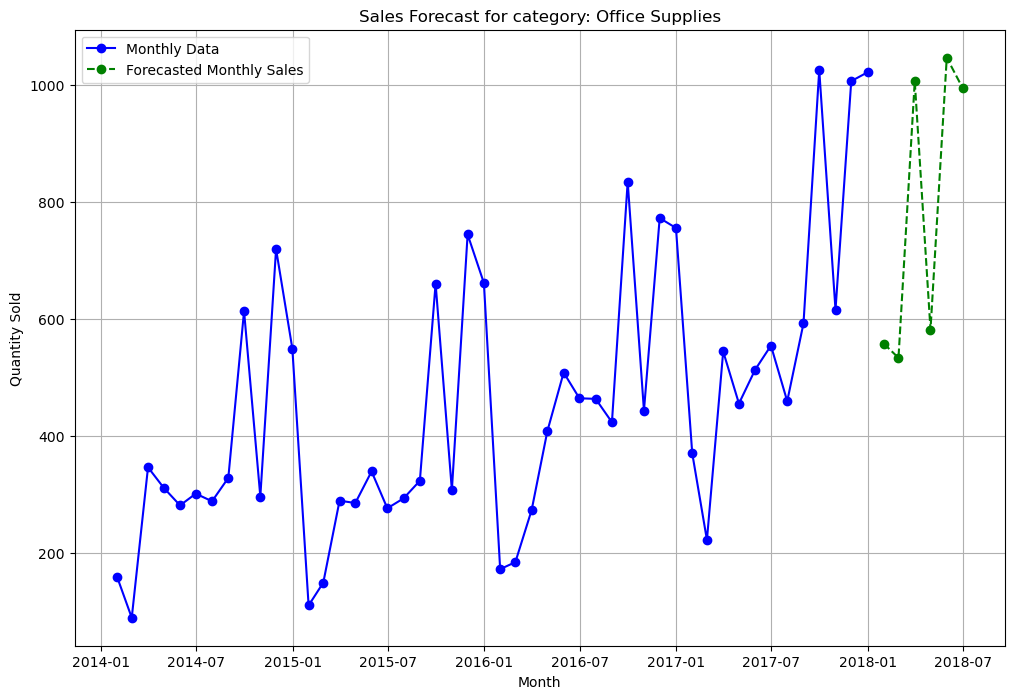

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41718D+00    |proj g|=  1.13360D-01

At iterate    5    f=  3.37001D+00    |proj g|=  1.42838D-02

At iterate   10    f=  3.33008D+00    |proj g|=  9.28178D-03

At iterate   15    f=  3.32968D+00    |proj g|=  5.34441D-03

At iterate   20    f=  3.32931D+00    |proj g|=  6.83900D-04

At iterate   25    f=  3.32924D+00    |proj g|=  8.08087D-04

At iterate   30    f=  3.32922D+00    |proj g|=  1.77977D-04

At iterate   35    f=  3.32922D+00    |proj g|=  3.01867D-04


10:01:39 - cmdstanpy - INFO - Chain [1] start processing



At iterate   40    f=  3.32922D+00    |proj g|=  8.17678D-05

At iterate   45    f=  3.32922D+00    |proj g|=  3.98627D-05

At iterate   50    f=  3.32921D+00    |proj g|=  9.02971D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     57      1     0     0   9.030D-05   3.329D+00
  F =   3.3292142745162772     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


10:01:39 - cmdstanpy - INFO - Chain [1] done processing


Technology Hybrid Model Evaluation:
MSE: 1222.17
RMSE: 34.96
MAE: 24.51
R2 Score: 0.81


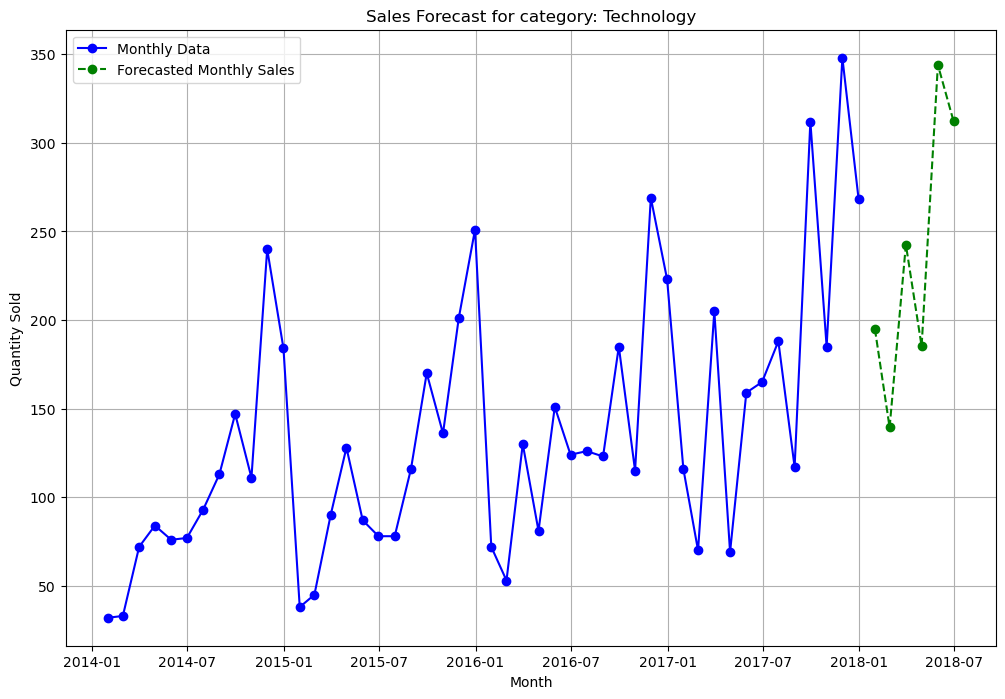

In [12]:
# Load and preprocess data
df = pd.read_csv('superstore_cleaned.csv', encoding='ISO-8859-1')
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Define categories
categories = df['Category'].unique()

# Generate US holidays
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=df['Order Date'].min(), end=df['Order Date'].max())


# Function to calculate evaluation metrics
def calculate_metrics(actual, pred):
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return mse, rmse, mae, r2

# Iterate through each category
for category in categories:
    # Filter data for the current subcategory
    category_data = df[df['Category'] == category]
    if category_data.empty:
        continue

    # Aggregate monthly data
    monthly_data = category_data.resample('M', on='Order Date')['Quantity'].sum()

    # Split into training and test sets
    train_data = monthly_data[:-6]
    test_data = monthly_data[-6:]

    # SARIMA model
    sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_result = sarima_model.fit()
    sarima_pred = sarima_result.get_forecast(steps=6).predicted_mean

    # Prophet model
    prophet_data = pd.DataFrame({'ds': train_data.index, 'y': train_data.values})
    prophet_model = Prophet(seasonality_mode='additive')
    prophet_model.fit(prophet_data)
    future = prophet_model.make_future_dataframe(periods=6, freq='M')
    forecast = prophet_model.predict(future)
    prophet_pred = forecast.set_index('ds')['yhat'].iloc[-6:].values

    # Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data.values)
    rf_pred = rf_model.predict(np.arange(len(train_data), len(train_data) + 6).reshape(-1, 1))

    # Combine predictions using the hybrid model (Linear Regression)
    predictions = pd.DataFrame({
        'SARIMA': sarima_pred,
        'Prophet': prophet_pred,
        'RandomForest': rf_pred
    }, index=pd.date_range(start=train_data.index[-1] + timedelta(days=1), periods=6, freq='M'))

    # Train the meta-model (Linear Regression as stacking) on predictions
    meta_model = LinearRegression()
    meta_model.fit(predictions, test_data)

    # Predict using the meta-model
    combined_pred = meta_model.predict(predictions)

    # Calculate metrics for the hybrid model
    hybrid_mse, hybrid_rmse, hybrid_mae, hybrid_r2 = calculate_metrics(test_data, combined_pred)

    # Print metrics
    print(f"{category} Hybrid Model Evaluation:")
    print(f"MSE: {hybrid_mse:.2f}")
    print(f"RMSE: {hybrid_rmse:.2f}")
    print(f"MAE: {hybrid_mae:.2f}")
    print(f"R2 Score: {hybrid_r2:.2f}")

    # Plot results for the current category
    plt.figure(figsize=(12, 8))

    # Plot historical data
    plt.plot(monthly_data.index, monthly_data.values, label='Monthly Data', marker='o', linestyle='-', color='blue')
#     plt.plot(test_data.index, test_data.values, label='Test Data', marker='o', linestyle='-', color='red')

    # Plot future predictions
    future_index = pd.date_range(start=monthly_data.index[-1] + timedelta(days=1), periods=6, freq='M')
    plt.plot(future_index, combined_pred, label='Forecasted Monthly Sales', marker='o', linestyle='--', color='green')

    plt.title(f'Sales Forecast for category: {category}')
    plt.xlabel('Month')
    plt.ylabel('Quantity Sold')
    plt.legend()
    plt.grid(True)

    # Show the figure
    plt.show()
